Aleksandra Bednarczuk

# Survey on Municipal Services of Barcelona's City

Source of the data: 

https://opendata-ajuntament.barcelona.cat/data/en/dataset/esm-bcn-evo

https://opendata-ajuntament.barcelona.cat/doc/BackOff_DescCompDefCamps/EnquestaServeisMunicipals_BCN/2019_Any/2019_r19006_ESM_Questionari_v1_0.pdf

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1.1. Reading the data

In [2]:
survey = pd.read_csv('../data/survey/2019_r19006_esm_evolucio_bdd_v1_0/2019_r19006_esm_evolucio_bdd_v1_0.csv', low_memory=False)

In [3]:
survey.head()

,Unnamed: 0,ID,ANY,NOM_DISTRICTE,NOM_BARRI,DATA_ENQ,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,RES_HAB,PADRO,...,DEM_BARRI_N1,CONSULTA_DIARI_Q01_N1,CONSULTA_DIARI_Q02_N1,VEURE_TELE_Q01_N1,VEURE_TELE_Q02_N1,VEURE_TELE_Q03_N1,HAB_COTXE_PART_1A4,US30D_XARXES_Q06,US30D_XARXES_Q07,PMI_1A3_2017
0,1,198900001,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN
1,2,198900002,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ALTRES,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
2,3,198900003,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
3,4,198900004,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EL PERIÓDICO,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
4,5,198900005,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN


In [4]:
del survey['Unnamed: 0']

In [5]:
survey.shape

(135813, 285)

In [6]:
for i in survey.columns.tolist():
    print(i, survey[i].unique(), "\n")

ID [198900001 198900002 198900003 ... 201907061 201907062 201907063] 

ANY [1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019] 

NOM_DISTRICTE ['CIUTAT VELLA' 'SANT MARTÍ' 'EIXAMPLE' 'SANTS - MONTJUÏC' 'LES CORTS'
 'SARRIÀ - SANT GERVASI' 'GRÀCIA' 'HORTA - GUINARDÓ' 'NOU BARRIS'
 'SANT ANDREU'] 

NOM_BARRI [nan 'EL RAVAL' 'EL BARRI GÒTIC' 'LA BARCELONETA'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'EL FORT PIENC'
 'LA SAGRADA FAMÍLIA' "LA DRETA DE L'EIXAMPLE"
 "L'ANTIGA ESQUERRA DE L'EIXAMPLE" "LA NOVA ESQUERRA DE L'EIXAMPLE"
 'SANT ANTONI' 'EL POBLE SEC' 'LA MARINA DEL PRAT VERMELL'
 'LA MARINA DE PORT' 'LA FONT DE LA GUATLLA' 'HOSTAFRANCS' 'LA BORDETA'
 'SANTS-BADAL' 'SANTS' 'LES CORTS' 'LA MATERNITAT I SANT RAMON'
 'PEDRALBES' 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'SARRIÀ'
 'LES TRES TORRES' 'SANT GERVASI-LA BONANOVA' 'EL PUTXET I EL FARRÓ'
 'SANT GERVASI-GALVANY' 'VALLCARCA I 

DEM_BCN_MUNI [nan 'MILLORAR LA NETEJA (NO CONCRETEN)' 'REDUIR IMPOSTOS I MULTES'
 'AUGMENTAR / MILLORAR LES ZONES VERDES' 'CREAR LLOCS DE TREBALL'
 'NO CONTESTA'
 "PROMOURE LA REHABILITACIÓ D'HABITATGES / FAÇANES / ASCENSORS"
 'AUGMENTAR/MILLORAR SERVEIS (NO CONCRETEN)'
 "MILLORAR L'ACCÉS A L'HABITATGE" 'MILLORAR LA SEGURETAT (NO CONCRETEN)'
 'MILLORAR LA CIRCULACIÓ / EL TRÀNSIT'
 'AUGMENTAR/MILLORAR LA INFORMACIÓ AL CIUTADÀ' 'ERADICAR LA DROGA'
 'AUGMENTAR/MILLORAR ELS EQUIPAMENTS ESPORTIUS' "AUGMENTAR L'APARCAMENT"
 'ALTRES' 'QUE ES MANTINGUI LA MATEIXA POLÍTICA MUNICIPAL'
 'EL METRO (NO CONCRETEN)' 'AUGMENTAR/MILLORAR ELS SERVEIS SOCIALS'
 'REDUIR LA CONTAMINACIÓ'
 'ARREGLAR EL RELLEU DELS CARRER / POSAR ESCALES MECÀNIQUES'
 'ALTRES ASPECTES ECONÒMICS' 'CAP / RES'
 'AUGMENTAR/MILLORAR EL TRANSPORT PÚBLIC' "MILLORAR L'URBANISME"
 'MILLORAR VALORS SOCIALS/EDUCACIÓ' "MILLORAR L'ACCESSIBILITAT"
 "AUGMENTAR/MILLORAR ELS EQUIPAMENTS D'ENSENYAMENT"
 'REDUIR LA DESIGUALTAT / TRACTE DISCRIMI

EVO1A_SOROLL [nan 'HA EMPITJORAT' 'ESTÀ IGUAL' 'HA MILLORAT' 'NO CONTESTA' 'NO HO SAP'] 

EVO1A_VERD [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_ENLLUM [nan 'HA EMPITJORAT' 'HA MILLORAT' 'ESTÀ IGUAL' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_URBA [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_ASFALT [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_FACANES [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_CIRCUL ['HA EMPITJORAT' 'ESTÀ IGUAL' 'HA MILLORAT' 'NO CONTESTA' 'NO HO SAP'] 

EVO1A_APARCA [nan 'HA EMPITJORAT' 'ESTÀ IGUAL' 'HA MILLORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_BUS [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_METRO [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_TRAM [nan 'NO HO SAP' 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO CONTESTA'] 

EVO1A_BICING [nan 'NO H

VAL_GESTBARRI [nan '3' '7' '5' '4' '6' '9' '8' '2' '1' '0 = MOLT DOLENTA'
 '10 = MOLT BONA' 'NO HO SAP' 'NO CONTESTA'] 

DEM_BARRI [nan 'ERADICAR LA DROGA' 'MILLORAR LA NETEJA (NO CONCRETEN)'
 "PROMOURE LA REHABILITACIÓ D'HABITATGES / FAÇANES / ASCENSORS"
 "MILLORAR L'URBANISME" 'REDUIR ELS SOROLLS (NO CONCRETEN)'
 'ARREGLAR EL RELLEU DELS CARRER / POSAR ESCALES MECÀNIQUES' 'ALTRES'
 'MILLORAR LA SEGURETAT (NO CONCRETEN)'
 'AUGMENTAR/MILLORAR EL TRANSPORT PÚBLIC'
 'AUGMENTAR / MILLORAR LES ZONES VERDES'
 'AUGMENTAR/MILLORAR ALTRES SERVEIS'
 'AUGMENTAR/MILLORAR SERVEIS (NO CONCRETEN)' 'NO CONTESTA' 'CAP / RES'
 "AUGMENTAR L'APARCAMENT" 'CREAR LLOCS DE TREBALL'
 "MILLORAR L'ACCÉS A L'HABITATGE"
 "MILLORAR LA RECOLLIDA D'ESCOMBRARIES I CONTENIDORS"
 'AUGMENTAR/MILLORAR ALTRES EQUIPAMENTS' 'AMPLIAR LA XARXA DE METRO'
 "AUGMENTAR/MILLORAR ELS EQUIPAMENTS D'ENSENYAMENT"
 'AUGMENTAR/MILLORAR ELS EQUIPAMENTS ESPORTIUS'
 'ELIMINAR LA BRUTÍCIA DELS GOSSOS' 'MILLORAR LA CIRCULACIÓ / EL TRÀNSIT'
 

PMS_ALIM [nan 'SÍ' 'NO' 'NO CONTESTA' 'NO HO SAP'] 

PMS_IMPREVIST650 [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

PMS_ENERGIA [nan 'SÍ' 'NO' 'NO HO SAP' 'NO CONTESTA'] 

HAB_REGIM_1A5 [nan 'EN LLOGUER' 'EN CESSIÓ GRATUÏTA' 'EN PROPIETAT' 'NO CONTESTA'
 'OCUPADA' "PAGA PER L'ÚS D'UNA HABITACIÓ I D'ALTRES ESPAIS COMPARTITS"
 'NO HO SAP' 'ALTRA SITUACIÓ'] 

HAB_HIP [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

COST_HIP_NRE [    nan  700.    300.    600.    500.    790.    400.    670.    900.
  750.    350.    360.    150.   1000.    327.    430.    285.    550.
   60.    160.    450.    312.    110.    267.    140.    850.   1100.
  220.    620.    355.    403.    520.    530.    250.    340.    800.
 1200.    260.    380.    190.    370.   1375.    650.   1250.   1500.
  630.    482.    680.    690.    200.    890.    286.   1400.    302.
  490.    915.    440.    770.    320.    311.    480.    460.    363.
  420.    280.    950.    774.    583.   1600.    580.    290.    397.
  533.    


US30D_XARXES_Q02 [nan 'TWITTER' 'ALTRES XARXES' 'ALTRES NO XARXES' 'LINKEDIN' 'TUENTI'
 'GOOGLEPLUS' 'PINTEREST' 'FACEBOOK' 'INSTAGRAM' 'WHATSAPP'] 

US30D_XARXES_Q03 [nan 'PINTEREST' 'LINKEDIN' 'GOOGLEPLUS' 'ALTRES NO XARXES' 'TWITTER'
 'ALTRES XARXES' 'TUENTI' 'FACEBOOK' 'INSTAGRAM' 'WHATSAPP'] 

US30D_XARXES_Q04 [nan 'GOOGLEPLUS' 'ALTRES XARXES' 'LINKEDIN' 'ALTRES NO XARXES' 'TWITTER'
 'TUENTI' 'FACEBOOK' 'INSTAGRAM' 'PINTEREST' 'WHATSAPP'] 

US30D_XARXES_Q05 [nan 'ALTRES NO XARXES' 'ALTRES XARXES' 'LINKEDIN' 'TUENTI' 'INSTAGRAM'
 'GOOGLEPLUS' 'PINTEREST' 'TWITTER'] 

US_INTERNET_MOBIL_1A3 [nan 'SÍ' 'NO' 'NO TÉ TELÈFON MÒBIL' 'NO HO SAP' 'NO CONTESTA'] 

IDEO_1A8 ['NO HO SAP / NO LI INTERESSA' 'CENTRE' 'ESQUERRA' 'CENTRE ESQUERRA'
 'DRETA' 'CENTRE DRETA' 'EXTREMA ESQUERRA' 'EXTREMA DRETA' 'APOLÍTIC'
 'NO CONTESTA'] 

SENTPERTI [nan 'TAN ESPANYOL COM CATALÀ' 'MÉS CATALÀ QUE ESPANYOL'
 'ÚNICAMENT CATALÀ' 'ÚNICAMENT ESPANYOL' 'NO HO SAP'
 'MÉS ESPANYOL QUE CATALÀ' 'NO CONTESTA' 'ALTRE

VAL_VERD_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_ENLLUM_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_URBA_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_ASFALT_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_FACANES_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_CIRCUL_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_APARCA_1A2 [nan 'SUSPÈS (0 A 4)' 'APROVAT (5 A 10)' 'NS / NC'] 

VAL_BUS_1A2 [nan 'APROVAT (5 A 10)' 'NS / NC' 'SUSPÈS (0 A 4)'] 

VAL_METRO_1A2 [nan 'APROVAT (5 A 10)' 'NS / NC' 'SUSPÈS (0 A 4)'] 

VAL_TRAM_1A2 [nan 'NS / NC' 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)'] 

VAL_BICING_1A2 [nan 'NS / NC' 'SUSPÈS (0 A 4)' 'APROVAT (5 A 10)'] 

VAL_GUB_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_SPEIS_1A2 [nan 'NS / NC' 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)'] 

VAL_SEGUR_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_SEGUR_BARRI_1A2 [nan 'APROVAT (5 A 10)' 'SUS

VEURE_TELE_Q03_N1 [nan 'CUATRO' 'LA 2' 'BETEVÉ (BTV)' 'TELE 5' 'LA 1' 'ALTRES' 'MOVISTAR #0'
 'ANTENA 3' 'TV3' '8TV' 'CANAL 33' 'LASEXTA' 'CANALS INFORMATIUS'
 'CANALS ESPORTIUS' 'ALTRES CANALS LOCALS'
 "CANALS D'ENTRETENIMENT / SÈRIES / CINEMA" 'CANALS INFANTILS/ JUVENILS'
 'INTERECONOMÍA' 'CANALS MUSICALS' 'CANALS AUTONÒMICS'
 'CANALS INTERNACIONALS' 'CANALS DOCUMENTALS' '13 TV'] 

HAB_COTXE_PART_1A4 ['CAP' 'UN' 'DOS' 'NS/NC' 'TRES' 'QUATRE O MÉS' nan] 

US30D_XARXES_Q06 [nan 'ALTRES XARXES' 'ALTRES NO XARXES' 'INSTAGRAM' 'GOOGLEPLUS'
 'PINTEREST' 'LINKEDIN'] 

US30D_XARXES_Q07 [nan 'PINTEREST'] 

PMI_1A3_2017 [nan 'ENTREVISTAT/ADA' 'UNA ALTRA PERSONA DE LA LLAR'
 'UNA ALTRA PERSONA DE FORA DE LA LLAR'] 



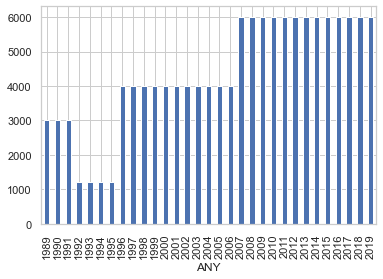

In [7]:
survey.groupby(['ANY']).size().plot.bar()

The sample size has varied over time: from 1989 to 1991 it included 3,000 interviews, from 1992 to 1995 - 1,200, from 1996 to 2006 - 4,000, and since 2007 it includes 6,000 interviews. The dataset is limited to most recent version of the survey, starting from 2007.

In [8]:
survey = survey.query('ANY >= 2007')

In [9]:
survey.shape

(78013, 285)

# 1.2. Subsetting the DataFrame to only relevant columns (survey questions)

In [10]:
# Reading questions dataset with a flag indicating if the question is relevant for further analysis
questions = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Preguntes_v1_0.xlsx')

In [11]:
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
0,ID,0,IDENTIFICADOR DE L'ENQUESTA,SURVEY IDENTIFIER,numeric
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor


In [12]:
questions.shape

(285, 5)

In [13]:
# Filtering out unnecessary questions
questions = questions.query('Flag == 1')
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor
6,SEXE,1,SEXE,SEX,factor


In [14]:
questions.shape

(77, 5)

In [15]:
# Dictionary with Catalan and Spanish names/descriptions of questions
df = questions[['Nom_variable', 'Question']]
questions_dict = {}
for i in range(len(df)):
    questions_dict[df.iloc[i].Nom_variable] = df.iloc[i].Question
questions_dict

{'ANY': 'SURVEY YEAR',
 'NOM_DISTRICTE': 'DISTRICT',
 'NOM_BARRI': 'BARRI',
 'GRANBARRI': 'GRAN BARRI',
 'SEXE': 'SEX',
 'EDAT1899_1A6': 'AGE',
 'NACIO_ACT_UE': 'WHAT IS YOUR NATIONALITY?',
 'TMP_RES_BCN_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?',
 'TMP_RES_BARRI_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?',
 'EVO1A_BCN': 'DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?',
 'FUTUR_BCN': 'FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?',
 'SATISF_RES_BCN_0A10': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?',
 'VAL_GESTMUNI': 'ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?',
 'VAL_NETEJA': 'CITY SERVICES - RATE: STREETS CLEANING',
 'VAL_SOROLL': 'CITY SERVICES - RATE: NOISE',
 'VAL_VERD': 'CITY SERVICES - RATE: GREEN AREAS',
 'VAL_ENLLUM': 'CITY SERVI

In [16]:
relevant_questions = list(questions.Nom_variable.unique())

In [17]:
# Filtering the table by choosing only those questions which are relevant for further analysis
survey = survey[relevant_questions]

Potentially relevant questions were preliminary chosen based on the survey questionnaire and metadata with questions available on the Open Data BCN website. Below, the number of NA values for each question marked as "relevant" is being calculated. This way it is checked if questions marked as relevant were used during the whole period of analysis or if they were introduced in the recent editions of the survey. It is being done in order to avoid variables with too many NA values.

In [18]:
temp_dict = {}
temp_dict['Questions'] = survey.columns.tolist()
for year in range(2007,2020):
    temp_list = []
    #print(year)
    df = survey.query('ANY >= @year')
    for i in survey.columns.tolist():
        temp_list.append(df[i].isna().sum())
    temp_dict[year] = temp_list

In [19]:
count_nans = pd.DataFrame.from_dict(temp_dict).set_index('Questions')

In [20]:
count_nans = count_nans.loc[count_nans.index.isin(questions.Nom_variable)]

In [21]:
count_nans[(count_nans.T != 0).any()]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Questions,,,,,,,,,,,,,
VAL_SOROLL,6000,0,0,0,0,0,0,0,0,0,0,0,0
VAL_TRAM,60013,54013,48000,42000,36000,30000,24000,18000,12000,6000,0,0,0
VAL_BICING,6000,0,0,0,0,0,0,0,0,0,0,0,0
VAL_CC,42013,36013,30000,24000,18000,12000,6000,0,0,0,0,0,0
US_APARCA,18013,12013,6000,0,0,0,0,0,0,0,0,0,0
US_TRAM,60013,54013,48000,42000,36000,30000,24000,18000,12000,6000,0,0,0
US_BICING,6000,0,0,0,0,0,0,0,0,0,0,0,0
US_CC,42013,36013,30000,24000,18000,12000,6000,0,0,0,0,0,0
US_ASSOCIA_BARRI,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0


In [22]:
count_nans[(count_nans.T != 0).any()].shape

(17, 13)

17 out of 77 questions marked as relevant have some NA values during the period of analysis. After examining the number of NAs, the analysis period is being limited to 2008-2019 (to be able to include variable VAL_SOROLL) and remaining variables with NA values are removed from the analysis. (Statistical significance of MUNI_VOTAR was checked during the process of model fitting and it can be removed from the analysis, as it was not significant.)

In [23]:
survey = survey.query('ANY >= 2008').dropna(axis='columns')

In [24]:
survey.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,HAB_COTXE_PART,HAB_M2_1A14,LLAR_INGRESSOS_1A10,CLASSESOC_ENT,SENTPERTI,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4
63800,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,RESTA PAÏSOS,MÉS DE 2 ANYS I FINS A 5 ANYS,MÉS DE 2 ANYS I FINS A 5 ANYS,ESTÀ IGUAL,...,NO,NO HO SAP,NO CONTESTA,CLASSE MITJANA-BAIXA,ALTRES,ESTRANGER,CASTELLÀ,UNIVERSITARIS,PARELLA SOLA,DUES
63801,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 45 A 54 ANYS,RESTA PAÏSOS,MÉS DE 2 ANYS I FINS A 5 ANYS,MÉS DE 2 ANYS I FINS A 5 ANYS,HA EMPITJORAT,...,NO,DE 61 A 70 M2,DE 1.001 A 1.500 EUROS,CLASSE MITJANA-BAIXA,ALTRES,ESTRANGER,CASTELLÀ,SECUNDARIS GENERALS,ALTRES SITUACIONS,DUES
63802,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,DONA,DE 18 A 24 ANYS,RESTA PAÏSOS,DE 6 MESOS FINS A 2 ANYS,DE 6 MESOS FINS A 2 ANYS,ESTÀ IGUAL,...,NO,FINS 50 M2,NO HO SAP,CLASSE MITJANA-BAIXA,ALTRES,ESTRANGER,ALTRES,SECUNDARIS GENERALS,PARELLA AMB FILLS,QUATRE O MÉS
63803,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 18 A 24 ANYS,RESTA PAÏSOS,MÉS DE 2 ANYS I FINS A 5 ANYS,MÉS DE 2 ANYS I FINS A 5 ANYS,HA EMPITJORAT,...,SÍ,NO HO SAP,DE 500 A 1.000 EUROS,CLASSE MITJANA-MITJANA,ALTRES,ESTRANGER,CASTELLÀ,OBLIGATORIS,ALTRES SITUACIONS,QUATRE O MÉS
63804,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 18 A 24 ANYS,ESPANYOLA,DE 6 MESOS FINS A 2 ANYS,DE 6 MESOS FINS A 2 ANYS,HA EMPITJORAT,...,NO,DE 91 A 100 M2,DE 500 A 1.000 EUROS,CLASSE MITJANA-BAIXA,ALTRES,RESTA D'ESPANYA,CASTELLÀ,OBLIGATORIS,ALTRES SITUACIONS,DUES


In [25]:
survey.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'VAL_GESTMUNI',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_BICING',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'US_VERD',
 'US_BUS',
 'US_METRO',
 'US_BICING',
 'US_ESPORT',
 'US_SIAC',
 'US_CSS',
 'US_CULT',
 'US_FESTESPOP',
 'US_MERCAT',
 'US_BIBLIO',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4']

Now the dataset includes 63 variables.

In [26]:
# Reading responses dataset with a flag indicating if the response relates to the question
# which was tagged as relevant for further analysis or not
responses = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Respostes_v1_0.xlsx')

In [27]:
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [28]:
responses.shape

(4529, 4)

In [29]:
responses = responses.query('Flag == 1')
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [30]:
responses.shape

(744, 4)

# 1.3. Translating the data from Catalan to English

As the survey was conducted in Catalan or Spanish and the answers are recorded in Catalan it needs to be translated into English for better understanding of the responses. The survey was initially translated on metadata tables with questions (*Preguntas*) and answers (*Respostes*). Below, I create a dictionary *translating_responses* with question name (*Nom_variable*) as a key and *temp_dict* as a value. *Temp_dict* is a nested dictionary, with Catalan answer as a key and English translation of this answer as a value.

In [31]:
translating_responses = {}
for i in responses.Nom_variable.unique():
    temp_dict = {}
    temp_dict[str(np.nan)] = np.nan
    df = responses.query('Nom_variable == @i')
    for j in range(len(df)):
        temp_dict[str(df.iloc[j].Resposta)] = df.iloc[j].Answer
    translating_responses[i] = temp_dict

In [32]:
survey['VAL_BUS'].unique()

array(['6', '7', 'NO HO SAP', '4', '5', '8', '9',
       '10 = EXCEL·LENT GESTIÓ', '0 = PÈSSIMA GESTIÓ', '3', '2', '1',
       'NO CONTESTA'], dtype=object)

In [33]:
translating_responses['VAL_BUS']

{'nan': nan,
 '0 = PÈSSIMA GESTIÓ': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10 = EXCEL·LENT GESTIÓ': 10,
 'NO HO SAP': "I DON'T KNOW",
 'NO CONTESTA': 'NO ANSWER'}

In [34]:
# Using a for loop, the survey is being translated by replacing Catalan version of an answer
# with its English translation using translating_answers dictionary created above.
for column in [i for i in list(survey.columns) if i not in ["ANY", "COST_LLOGUER_NRE", "COST_ESPAI_NRE"]]:
    translate = translating_responses[column]
    for i in survey[column].unique():
        survey[column].replace(i, translate[str(i)], inplace=True)

In [35]:
survey['VAL_BUS'].unique()

array([6, 7, "I DON'T KNOW", 4, 5, 8, 9, 10, 0, 3, 2, 1, 'NO ANSWER'],
      dtype=object)

# 1.4. Subsetting the data to responses of people aged 65+ 

In [36]:
survey.shape

(72013, 63)

In [37]:
survey.groupby(['EDAT1899_1A6']).size()

EDAT1899_1A6
65 YEARS AND OVER      18141
FROM 18 TO 24 YEARS     5365
FROM 25 TO 34 YEARS    12869
FROM 35 TO 44 YEARS    14076
FROM 45 TO 54 YEARS    11812
FROM 55 TO 64 YEARS     9750
dtype: int64

In [38]:
round(survey.groupby(['EDAT1899_1A6']).size() / survey.groupby(['EDAT1899_1A6']).size().sum() * 100,2)

EDAT1899_1A6
65 YEARS AND OVER      25.19
FROM 18 TO 24 YEARS     7.45
FROM 25 TO 34 YEARS    17.87
FROM 35 TO 44 YEARS    19.55
FROM 45 TO 54 YEARS    16.40
FROM 55 TO 64 YEARS    13.54
dtype: float64

In [39]:
survey_65 = survey.query('EDAT1899_1A6 == "65 YEARS AND OVER"')

In [40]:
survey_65.shape

(18141, 63)

In [41]:
# Creating a copy of the data subset for further data preparation and features generation
data = survey_65.copy()

In [42]:
survey_65.shape, data.shape

((18141, 63), (18141, 63))

# 1.5. Data preparation

Below, number of functions is defined and used to perform basic exploratory data analysis of each variable. It has functions for calculating numeric and percentage distribution of responses, displaying crosstab of independent variables levels vs dependent variable levels, as well as printing distribution plots. 

In [43]:
def size_num(var):
    return data.groupby([var]).size()
def size_pctg(var):
    return round(data.groupby([var]).size() / data.groupby([var]).size().sum() * 100,2)
def ctab(var):
    return pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
def simple_plot(var):
    df = pd.DataFrame(data.groupby([var]).size()).reset_index().rename(columns= {var: 'x', 0: 'y'})
    if var != 'ANY' and var[:3] != 'VAL' and var[:3] != 'EVO' and var[:5] != 'FUTUR' and var[:6] != 'SATISF':
        df = df.sort_values(by='y', ascending=False)
    plt.figure(figsize=(12,4))
    plt.bar(df['x'].astype(str), df['y'])
    plt.xticks(rotation='vertical')
    for i in range(len(df)):
        plt.annotate(df['y'][i], xy=(str(df['x'][i]),df['y'][i]), ha='center', va='bottom')
    plt.show()
def grouped_plot(var):
    table = pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
    return table.plot(kind='bar')
def stacked_plot(var):
    table = pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
    return table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## 1.5.1 Dependent variable

Survey question: IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?

In [44]:
y = 'CANVI_LLOC_RES_1A3'

In [45]:
size_num(y)

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           156
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     1701
I WOULD LIVE OUTSIDE BARCELONA                        2242
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         14023
NO ANSWER                                                4
OTHERS                                                  15
dtype: int64

In [46]:
size_pctg(y)

CANVI_LLOC_RES_1A3
I DON'T KNOW                                          0.86
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     9.38
I WOULD LIVE OUTSIDE BARCELONA                       12.36
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         77.30
NO ANSWER                                             0.02
OTHERS                                                0.08
dtype: float64

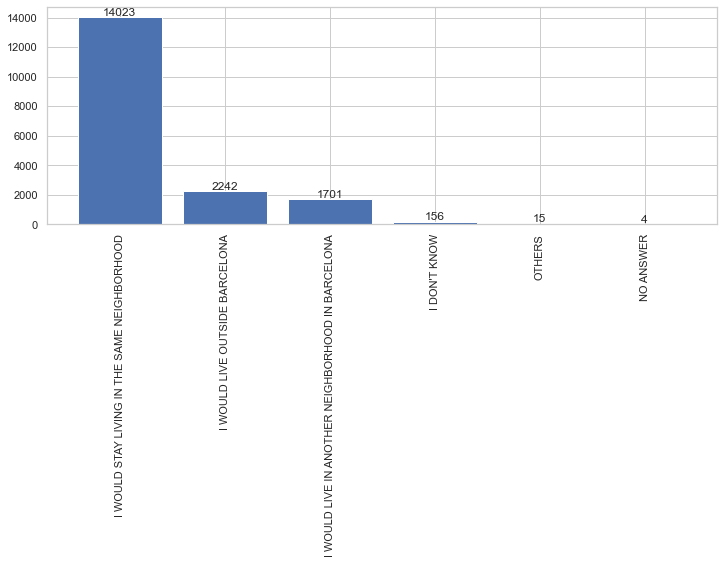

In [47]:
simple_plot(y)

In [48]:
data_prep = {'I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD': 0,
            'I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA': 1,
             'I WOULD LIVE OUTSIDE BARCELONA': np.nan,
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan,
             'OTHERS': np.nan
            }
data['Would_live_in_another_neighborhood'] = [data_prep[i] for i in data[y]]

In [49]:
count_stay = len(data[data['Would_live_in_another_neighborhood']==0])
count_move = len(data[data['Would_live_in_another_neighborhood']==1])
pct_of_stay = count_stay/(count_stay + count_move)
pct_of_move = count_move/(count_stay + count_move)

print("Number of elderly who would change their neighborhood or move out from the city:", count_move)
print("Number of elderly who would stay in their neighborhood:", count_stay)
print("Percentage of elderly who would change their neighborhood or move out from the city:", round(pct_of_move*100,2), '%')
print("Percentage of elderly who would stay in their neighborhood:", round(pct_of_stay*100,2), '%')

Number of elderly who would change their neighborhood or move out from the city: 1701
Number of elderly who would stay in their neighborhood: 14023
Percentage of elderly who would change their neighborhood or move out from the city: 10.82 %
Percentage of elderly who would stay in their neighborhood: 89.18 %


## 1.5.2 Independent variables

First insight into the dataset using cross tabulation of dependent variable and different features:

In [50]:
for i in data.columns.tolist():
    display(ctab(i))

Would_live_in_another_neighborhood,0.0,1.0
ANY,,
2008,1185,123
2009,1172,117
2010,1168,140
2011,1131,145
2012,1149,146
2013,1204,154
2014,1195,130
2015,1225,144
2016,1245,142


Would_live_in_another_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,918,199
EIXAMPLE,2357,193
GRÀCIA,1186,104
HORTA - GUINARDÓ,1606,218
LES CORTS,1251,59
NOU BARRIS,1413,249
SANT ANDREU,1135,176
SANT MARTÍ,1674,202
SANTS - MONTJUÏC,1206,243


Would_live_in_another_neighborhood,0.0,1.0
NOM_BARRI,,
BARÓ DE VIVER,22,9
CAN BARÓ,79,19
CAN PEGUERA,20,3
CANYELLES,102,8
CIUTAT MERIDIANA,76,39
...,...,...
VALLBONA,8,5
VALLCARCA I ELS PENITENTS,179,20
"VALLVIDRERA, EL TIBIDABO I LES PLANES",32,2


Would_live_in_another_neighborhood,0.0,1.0
GRANBARRI,,
"CANYELLES, LES ROQUETES I LA TRINITAT NOVA",328,71
EL BARRI GÒTIC,214,32
"EL BESÒS, EL MARESME I PROVENÇALS",279,47
EL CAMP D'EN GRASSOT I GRÀCIA NOVA,424,31
EL CARMEL I CAN BARÓ,347,78
EL CLOT I EL CAMP DE L'ARPA,358,41
EL FORT PIENC,365,36
EL GUINARDÓ,382,54
"EL PARC, LA LLACUNA I LA VILA OLÍMPICA",273,32


Would_live_in_another_neighborhood,0.0,1.0
SEXE,,
MAN,5452,628
WOMAN,8571,1073


Would_live_in_another_neighborhood,0.0,1.0
EDAT1899_1A6,,
65 YEARS AND OVER,14023,1701


Would_live_in_another_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,111,8
REMAINING COUNTRIES,125,19
SPANISH,13787,1674


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,48,13
I DON'T KNOW,2,0
I HAVE ALWAYS LIVED IN THE CITY,5997,785
MORE THAN 10 YEARS,7802,879
MORE THAN 2 YEARS AND UP TO 5 YEARS,76,11
MORE THAN 5 YEARS AND UP TO 10 YEARS,96,13
NO ANSWER,2,0


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,142,40
I HAVE ALWAYS LIVED IN THE BARRI,2252,183
LESS THAN SIX MONTHS,38,11
MORE THAN 10 YEARS,11075,1320
MORE THAN 2 YEARS AND UP TO 5 YEARS,198,67
MORE THAN 5 YEARS AND UP TO 10 YEARS,316,80
NO ANSWER,2,0


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,350,31
IT HAS IMPROVED,4819,462
IT'S THE SAME,3780,390
IT'S WORSE,5065,817
NO ANSWER,9,1


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1899,233
IT WILL GET WORSE,3186,506
IT WILL IMPROVE,7311,757
IT WILL STAY THE SAME,1616,203
NO ANSWER,11,2


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,52,8
1,11,2
2,21,6
3,42,10
4,121,42
5,513,125
6,716,116
7,1866,260
8,4016,479


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,418,68
1,73,20
2,213,41
3,478,60
4,968,164
5,2825,397
6,2468,315
7,2900,275
8,2150,219


Would_live_in_another_neighborhood,0.0,1.0
VAL_NETEJA,,
0,301,62
1,66,15
2,242,49
3,516,90
4,1014,153
5,1793,242
6,2084,275
7,2884,295
8,3256,349


Would_live_in_another_neighborhood,0.0,1.0
VAL_SOROLL,,
0,549,128
1,181,45
2,573,99
3,1122,177
4,1788,243
5,2512,262
6,2171,221
7,2175,236
8,1789,174


Would_live_in_another_neighborhood,0.0,1.0
VAL_VERD,,
0,252,56
1,59,14
2,230,47
3,506,80
4,1049,185
5,1886,297
6,2192,273
7,3001,288
8,2866,296


Would_live_in_another_neighborhood,0.0,1.0
VAL_ENLLUM,,
0,97,16
1,29,5
2,93,27
3,228,50
4,706,114
5,1467,224
6,2411,267
7,3818,443
8,3496,384


Would_live_in_another_neighborhood,0.0,1.0
VAL_URBA,,
0,173,36
1,27,3
2,119,22
3,303,62
4,763,140
5,1978,295
6,2712,322
7,3288,332
8,2291,232


Would_live_in_another_neighborhood,0.0,1.0
VAL_ASFALT,,
0,278,51
1,65,10
2,263,48
3,638,109
4,1402,198
5,2236,325
6,2665,284
7,3148,342
8,2284,240


Would_live_in_another_neighborhood,0.0,1.0
VAL_CIRCUL,,
0,341,55
1,116,24
2,544,73
3,1223,170
4,2198,291
5,2943,348
6,2431,304
7,1984,187
8,1164,139


Would_live_in_another_neighborhood,0.0,1.0
VAL_APARCA,,
0,1519,249
1,448,83
2,1455,194
3,2096,262
4,2282,244
5,1800,207
6,1016,114
7,736,55
8,432,41


Would_live_in_another_neighborhood,0.0,1.0
VAL_BUS,,
0,133,21
1,30,6
2,103,28
3,248,52
4,658,124
5,1117,170
6,1665,218
7,3262,366
8,3967,455


Would_live_in_another_neighborhood,0.0,1.0
VAL_METRO,,
0,42,9
1,15,2
2,33,14
3,77,8
4,206,34
5,622,108
6,1215,158
7,2954,365
8,4454,542


Would_live_in_another_neighborhood,0.0,1.0
VAL_BICING,,
0,531,82
1,82,10
2,223,48
3,411,68
4,667,82
5,867,112
6,855,104
7,1246,142
8,1104,129


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,469,88
1,130,24
2,488,91
3,1160,160
4,2191,298
5,2676,320
6,2538,264
7,2173,217
8,1167,113


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,438,100
1,131,42
2,430,117
3,981,185
4,1681,241
5,2306,268
6,2412,241
7,2719,257
8,2009,175


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESPORT,,
0,213,39
1,40,6
2,119,27
3,229,59
4,551,97
5,1099,164
6,1467,179
7,2107,264
8,1869,188


Would_live_in_another_neighborhood,0.0,1.0
VAL_SIAC,,
0,124,30
1,21,4
2,103,15
3,174,31
4,339,65
5,967,146
6,1622,201
7,2785,307
8,2806,327


Would_live_in_another_neighborhood,0.0,1.0
VAL_CSS,,
0,146,33
1,28,10
2,117,21
3,212,42
4,488,78
5,976,146
6,1349,162
7,1899,205
8,2000,222


Would_live_in_another_neighborhood,0.0,1.0
VAL_CULT,,
0,49,13
1,8,6
2,44,10
3,101,18
4,276,55
5,776,137
6,1436,186
7,2830,317
8,3157,309


Would_live_in_another_neighborhood,0.0,1.0
VAL_FESTESPOP,,
0,132,25
1,22,7
2,86,11
3,185,42
4,398,77
5,1099,165
6,1666,221
7,3046,318
8,2914,286


Would_live_in_another_neighborhood,0.0,1.0
VAL_MERCAT,,
0,93,16
1,15,7
2,82,14
3,174,22
4,427,75
5,879,131
6,1404,205
7,3057,402
8,4158,454


Would_live_in_another_neighborhood,0.0,1.0
VAL_BIBLIO,,
0,53,5
1,8,1
2,25,4
3,48,13
4,118,24
5,417,52
6,767,115
7,1978,238
8,3257,420


Would_live_in_another_neighborhood,0.0,1.0
US_VERD,,
DO NOT USE,4669,603
NO ANSWER,12,3
USE,9342,1095


Would_live_in_another_neighborhood,0.0,1.0
US_BUS,,
DO NOT USE,2340,207
NO ANSWER,10,1
USE,11673,1493


Would_live_in_another_neighborhood,0.0,1.0
US_METRO,,
DO NOT USE,4318,456
NO ANSWER,13,1
USE,9692,1244


Would_live_in_another_neighborhood,0.0,1.0
US_BICING,,
DO NOT USE,13728,1651
NO ANSWER,39,6
USE,256,44


Would_live_in_another_neighborhood,0.0,1.0
US_ESPORT,,
DO NOT USE,11945,1401
NO ANSWER,52,6
USE,2026,294


Would_live_in_another_neighborhood,0.0,1.0
US_SIAC,,
DO NOT USE,8096,963
NO ANSWER,22,0
USE,5905,738


Would_live_in_another_neighborhood,0.0,1.0
US_CSS,,
DO NOT USE,9715,1163
NO ANSWER,34,5
USE,4274,533


Would_live_in_another_neighborhood,0.0,1.0
US_CULT,,
DO NOT USE,8884,1079
NO ANSWER,22,2
USE,5117,620


Would_live_in_another_neighborhood,0.0,1.0
US_FESTESPOP,,
DO NOT USE,7966,990
NO ANSWER,19,1
USE,6038,710


Would_live_in_another_neighborhood,0.0,1.0
US_MERCAT,,
DO NOT USE,4007,425
NO ANSWER,15,1
USE,10001,1275


Would_live_in_another_neighborhood,0.0,1.0
US_BIBLIO,,
DO NOT USE,9649,1071
NO ANSWER,23,4
USE,4351,626


Would_live_in_another_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,34,6
BICYCLE (BICING),12,5
BUS,6157,805
CAR,691,73
METRO / CATALAN RAILWAYS (FGC) URBAN,4246,546
MOTORCYCLE,101,14
NO ANSWER,11,0
OTHERS,44,4
TAXI,481,41


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_1A5,,
I DON'T KNOW,266,32
LITTLE EQUIPPED,973,171
NO ANSWER,7,1
NORMAL,1349,181
NOTHING EQUIPPED,41,9
PRETTY EQUIPPED,9303,1097
VERY GIFTED,2084,210


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A5,,
I DON'T KNOW,101,9
LITTLE EQUIPPED,1374,249
NO ANSWER,10,1
NORMAL,1294,209
NOTHING EQUIPPED,123,32
PRETTY EQUIPPED,8402,939
VERY GIFTED,2719,262


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,114,23
IT HAS IMPROVED,7394,680
IT'S THE SAME,4130,434
IT'S WORSE,2379,564
NO ANSWER,6,0


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1686,221
IT WILL GET WORSE,1718,461
IT WILL IMPROVE,7967,723
IT WILL STAY THE SAME,2645,296
NO ANSWER,7,0


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,16,37
1,9,7
2,11,33
3,20,42
4,56,78
5,279,171
6,609,194
7,1848,323
8,4534,465


Would_live_in_another_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,286,43
"NEITHER THE BEST, NOR THE WORST",4929,1013
NO ANSWER,4,2
ONE OF THE BEST,8531,364
ONE OF THE WORST,273,279


Would_live_in_another_neighborhood,0.0,1.0
CANVI_LLOC_RES_1A3,,
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA,0,1701
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD,14023,0


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,192,59
1,41,18
2,127,40
3,282,67
4,650,128
5,1963,334
6,2577,306
7,3331,330
8,2684,190


Would_live_in_another_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,3,0
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO,6421,705
NO ANSWER,98,16
YES,6502,812


Would_live_in_another_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 101 TO 120 M2,850,70
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 121 TO 150 M2,508,35
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2


Would_live_in_another_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2670,314
"FROM 1,501 TO 2,000 EUROS",1539,216
"FROM 2,001 TO 2,500 EUROS",818,96
"FROM 2,501 TO 3,000 EUROS",467,58
"FROM 3,001 TO 5,000 EUROS",559,55
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",3280,427
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,966,90


Would_live_in_another_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,58,2
I DON'T KNOW,370,29
LOW CLASS,1329,222
MIDDLE-HIGH CLASS,644,62
MIDDLE-LOW CLASS,4413,632
MIDDLE-MIDDLE CLASS,7044,732
NO ANSWER,165,22


Would_live_in_another_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",5292,623
I DON'T KNOW,94,10
MORE CATALAN THAN SPANISH,3480,423
MORE SPANISH THAN CATALAN,872,119
NO ANSWER,186,19
ONLY CATALAN,2714,332
ONLY SPANISH,1121,135
OTHER,264,40


Would_live_in_another_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,6251,821
FOREIGN,577,79
NO ANSWER,9,1
REST OF CATALONIA,1726,173
REST OF SPAIN,5460,627


Would_live_in_another_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,7377,856
NO ANSWER,13,1
OTHER,76,17
SPANISH,6557,827


Would_live_in_another_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,1765,191
GENERAL SECONDARY,1908,251
MANDATORY,6046,709
NO ANSWER,51,10
POST UNIVERSITY,96,11
PROFESSIONAL SECONDARY,1862,244
UNIVERSITY,2295,285


Would_live_in_another_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,1435,189
COUPLE WITH NO CHILDREN,6138,740
NO ANSWER,1,0
OTHER FAMILY,597,73
OTHER SITUATIONS,198,15
SINGLE,4218,521
SINGLE-PARENT WITH CHILDREN,1436,163


Would_live_in_another_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,679,84
ONE,4218,521
THREE,1638,178
TWO,7488,918


Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,14023,0
1.0,0,1701


In [51]:
for i in data.columns.tolist():
    display(size_pctg(i))

ANY
2008    8.11
2009    8.04
2010    8.10
2011    8.37
2012    8.42
2013    8.53
2014    8.51
2015    8.63
2016    8.60
2017    8.27
2018    8.26
2019    8.17
dtype: float64

NOM_DISTRICTE
CIUTAT VELLA              7.30
EIXAMPLE                 15.89
GRÀCIA                    8.00
HORTA - GUINARDÓ         11.55
LES CORTS                 7.90
NOU BARRIS               11.07
SANT ANDREU               8.25
SANT MARTÍ               12.11
SANTS - MONTJUÏC          9.62
SARRIÀ - SANT GERVASI     8.31
dtype: float64

NOM_BARRI
BARÓ DE VIVER                            0.21
CAN BARÓ                                 0.62
CAN PEGUERA                              0.14
CANYELLES                                0.74
CIUTAT MERIDIANA                         1.06
                                         ... 
VALLBONA                                 0.13
VALLCARCA I ELS PENITENTS                1.23
VALLVIDRERA, EL TIBIDABO I LES PLANES    0.21
VERDUN                                   0.74
VILAPICINA I LA TORRE LLOBETA            1.30
Length: 73, dtype: float64

GRANBARRI
CANYELLES, LES ROQUETES I LA TRINITAT NOVA              2.66
EL BARRI GÒTIC                                          1.58
EL BESÒS, EL MARESME I PROVENÇALS                       2.27
EL CAMP D'EN GRASSOT I GRÀCIA NOVA                      2.82
EL CARMEL I CAN BARÓ                                    2.78
EL CLOT I EL CAMP DE L'ARPA                             2.60
EL FORT PIENC                                           2.55
EL GUINARDÓ                                             2.78
EL PARC, LA LLACUNA I LA VILA OLÍMPICA                  1.94
EL POBLE SEC                                            2.20
EL POBLENOU I DIAGONAL MAR                              2.12
EL RAVAL                                                1.81
ELS BARRIS DE LA VALL D'HEBRON                          2.99
HORTA I LA FONT D'EN FARGUES                            3.00
L'ANTIGA ESQUERRA DE L'EIXAMPLE                         2.66
LA BARCELONETA                                          1.97
LA DRETA DE L'

SEXE
MAN      39.93
WOMAN    60.07
dtype: float64

EDAT1899_1A6
65 YEARS AND OVER    100.0
dtype: float64

NACIO_ACT_UE
OTHER EU                0.73
REMAINING COUNTRIES     0.89
SPANISH                98.38
dtype: float64

TMP_RES_BCN_1A6
FROM 6 MONTHS TO 2 YEARS                 0.40
I DON'T KNOW                             0.01
I HAVE ALWAYS LIVED IN THE CITY         42.51
MORE THAN 10 YEARS                      55.74
MORE THAN 2 YEARS AND UP TO 5 YEARS      0.57
MORE THAN 5 YEARS AND UP TO 10 YEARS     0.76
NO ANSWER                                0.01
dtype: float64

TMP_RES_BARRI_1A6
FROM 6 MONTHS TO 2 YEARS                 1.19
I HAVE ALWAYS LIVED IN THE BARRI        15.03
LESS THAN SIX MONTHS                     0.33
MORE THAN 10 YEARS                      79.14
MORE THAN 2 YEARS AND UP TO 5 YEARS      1.74
MORE THAN 5 YEARS AND UP TO 10 YEARS     2.57
NO ANSWER                                0.01
dtype: float64

EVO1A_BCN
I DON'T KNOW        2.52
IT HAS IMPROVED    32.45
IT'S THE SAME      25.90
IT'S WORSE         39.04
NO ANSWER           0.08
dtype: float64

FUTUR_BCN
I DON'T KNOW             13.76
IT WILL GET WORSE        24.79
IT WILL IMPROVE          50.03
IT WILL STAY THE SAME    11.32
NO ANSWER                 0.09
dtype: float64

SATISF_RES_BCN_0A10
0                0.62
1                0.13
2                0.39
3                0.55
4                1.46
5                5.00
6                5.88
7               13.94
8               28.00
9               15.85
10              27.68
I DON'T KNOW     0.31
NO ANSWER        0.20
dtype: float64

VAL_GESTMUNI
0                3.49
1                0.71
2                1.82
3                3.69
4                7.55
5               20.78
6               17.47
7               19.61
8               14.53
9                3.38
10               2.75
I DON'T KNOW     4.02
NO ANSWER        0.20
dtype: float64

VAL_NETEJA
0                2.59
1                0.57
2                1.98
3                4.04
4                7.67
5               13.03
6               14.90
7               19.91
8               22.54
9                6.67
10               5.87
I DON'T KNOW     0.22
NO ANSWER        0.03
dtype: float64

VAL_SOROLL
0                4.98
1                1.57
2                4.62
3                8.74
4               13.10
5               17.42
6               14.86
7               14.97
8               11.95
9                2.84
10               2.39
I DON'T KNOW     2.49
NO ANSWER        0.08
dtype: float64

VAL_VERD
0                2.24
1                0.53
2                1.86
3                4.07
4                8.15
5               14.26
6               15.73
7               20.66
8               19.40
9                4.91
10               3.75
I DON'T KNOW     4.40
NO ANSWER        0.04
dtype: float64

VAL_ENLLUM
0                0.76
1                0.23
2                0.84
3                1.88
4                5.42
5               11.00
6               16.99
7               26.85
8               24.48
9                5.53
10               4.40
I DON'T KNOW     1.58
NO ANSWER        0.03
dtype: float64

VAL_URBA
0                1.46
1                0.23
2                1.00
3                2.59
4                6.22
5               14.77
6               19.09
7               22.40
8               15.70
9                3.74
10               2.43
I DON'T KNOW    10.26
NO ANSWER        0.11
dtype: float64

VAL_ASFALT
0                2.32
1                0.53
2                2.16
3                5.18
4               10.53
5               16.44
6               18.47
7               21.60
8               15.69
9                3.47
10               2.38
I DON'T KNOW     1.20
NO ANSWER        0.03
dtype: float64

VAL_CIRCUL
0                2.84
1                1.04
2                4.17
3                9.14
4               15.90
5               20.68
6               17.14
7               13.78
8                7.89
9                1.46
10               1.15
I DON'T KNOW     4.71
NO ANSWER        0.11
dtype: float64

VAL_APARCA
0               12.08
1                3.58
2               10.67
3               15.16
4               15.94
5               12.52
6                6.88
7                4.89
8                2.89
9                0.61
10               0.63
I DON'T KNOW    13.96
NO ANSWER        0.17
dtype: float64

VAL_BUS
0                1.05
1                0.25
2                0.90
3                2.07
4                5.09
5                8.55
6               12.00
7               22.91
8               27.88
9                8.16
10               6.06
I DON'T KNOW     5.04
NO ANSWER        0.03
dtype: float64

VAL_METRO
0                0.37
1                0.11
2                0.36
3                0.58
4                1.61
5                4.84
6                8.82
7               21.07
8               31.70
9               11.20
10               7.56
I DON'T KNOW    11.69
NO ANSWER        0.09
dtype: float64

VAL_BICING
0                4.12
1                0.61
2                1.82
3                3.10
4                4.80
5                6.24
6                6.13
7                8.70
8                7.77
9                2.17
10               1.68
I DON'T KNOW    52.46
NO ANSWER        0.40
dtype: float64

VAL_SEGUR
0                4.01
1                1.14
2                3.95
3                8.69
4               15.95
5               18.85
6               17.42
7               14.76
8                8.01
9                1.62
10               1.21
I DON'T KNOW     4.32
NO ANSWER        0.07
dtype: float64

VAL_SEGUR_BARRI
0                4.04
1                1.37
2                3.71
3                7.62
4               12.52
5               16.47
6               16.52
7               18.21
8               13.32
9                3.12
10               1.93
I DON'T KNOW     1.12
NO ANSWER        0.04
dtype: float64

VAL_ESPORT
0                1.89
1                0.31
2                1.09
3                2.03
4                4.36
5                8.27
6               10.40
7               14.94
8               12.84
9                2.93
10               2.34
I DON'T KNOW    38.31
NO ANSWER        0.29
dtype: float64

VAL_SIAC
0                1.12
1                0.19
2                0.82
3                1.43
4                2.79
5                7.47
6               11.69
7               19.33
8               19.35
9                5.33
10               3.86
I DON'T KNOW    26.49
NO ANSWER        0.13
dtype: float64

VAL_CSS
0                1.33
1                0.33
2                0.93
3                1.83
4                3.68
5                7.31
6                9.52
7               13.10
8               13.75
9                4.70
10               4.48
I DON'T KNOW    38.81
NO ANSWER        0.23
dtype: float64

VAL_CULT
0                0.51
1                0.09
2                0.40
3                0.85
4                2.24
5                6.03
6               10.30
7               19.64
8               21.43
9                5.08
10               2.91
I DON'T KNOW    30.34
NO ANSWER        0.17
dtype: float64

VAL_FESTESPOP
0                1.18
1                0.22
2                0.74
3                1.54
4                3.29
5                8.51
6               11.91
7               20.97
8               19.85
9                5.11
10               3.60
I DON'T KNOW    22.93
NO ANSWER        0.15
dtype: float64

VAL_MERCAT
0                0.79
1                0.17
2                0.61
3                1.42
4                3.40
5                6.71
6               10.41
7               21.71
8               29.12
9                9.40
10               6.65
I DON'T KNOW     9.54
NO ANSWER        0.09
dtype: float64

VAL_BIBLIO
0                0.39
1                0.07
2                0.24
3                0.41
4                0.95
5                3.14
6                5.67
7               14.16
8               23.16
9                9.80
10               5.70
I DON'T KNOW    36.12
NO ANSWER        0.20
dtype: float64

US_VERD
DO NOT USE    33.63
NO ANSWER      0.09
USE           66.28
dtype: float64

US_BUS
DO NOT USE    16.26
NO ANSWER      0.06
USE           83.68
dtype: float64

US_METRO
DO NOT USE    29.94
NO ANSWER      0.08
USE           69.97
dtype: float64

US_BICING
DO NOT USE    97.86
NO ANSWER      0.29
USE            1.85
dtype: float64

US_ESPORT
DO NOT USE    84.69
NO ANSWER      0.39
USE           14.92
dtype: float64

US_SIAC
DO NOT USE    57.30
NO ANSWER      0.15
USE           42.54
dtype: float64

US_CSS
DO NOT USE    69.33
NO ANSWER      0.28
USE           30.38
dtype: float64

US_CULT
DO NOT USE    63.66
NO ANSWER      0.16
USE           36.18
dtype: float64

US_FESTESPOP
DO NOT USE    57.38
NO ANSWER      0.14
USE           42.48
dtype: float64

US_MERCAT
DO NOT USE    27.87
NO ANSWER      0.10
USE           72.02
dtype: float64

US_BIBLIO
DO NOT USE    67.78
NO ANSWER      0.19
USE           32.03
dtype: float64

TRANSP_MOU
BICYCLE                                  0.25
BICYCLE (BICING)                         0.09
BUS                                     44.03
CAR                                      5.05
METRO / CATALAN RAILWAYS (FGC) URBAN    30.67
MOTORCYCLE                               0.82
NO ANSWER                                0.08
OTHERS                                   0.33
TAXI                                     3.10
TRAIN (RENFE / FGC INTERURBAN)           0.30
TRAM (TRAM, TRAMBAIX, TRAMBESÒS)         0.41
WALKING                                 14.87
dtype: float64

VAL_TRANSP_1A5
I DON'T KNOW         1.88
LITTLE EQUIPPED      7.74
NO ANSWER            0.04
NORMAL               9.98
NOTHING EQUIPPED     0.34
PRETTY EQUIPPED     65.61
VERY GIFTED         14.41
dtype: float64

VAL_TRANSP_BARRI_1A5
I DON'T KNOW         0.70
LITTLE EQUIPPED     10.68
NO ANSWER            0.06
NORMAL               9.73
NOTHING EQUIPPED     1.02
PRETTY EQUIPPED     59.29
VERY GIFTED         18.52
dtype: float64

EVO1A_BARRI
I DON'T KNOW        0.94
IT HAS IMPROVED    49.82
IT'S THE SAME      28.60
IT'S WORSE         20.61
NO ANSWER           0.03
dtype: float64

FUTUR_BARRI
I DON'T KNOW             12.49
IT WILL GET WORSE        15.46
IT WILL IMPROVE          53.53
IT WILL STAY THE SAME    18.48
NO ANSWER                 0.04
dtype: float64

SATISF_RES_BARRI_0A10
0                0.55
1                0.14
2                0.44
3                0.63
4                1.21
5                3.75
6                5.85
7               14.28
8               31.34
9               19.13
10              22.34
I DON'T KNOW     0.26
NO ANSWER        0.07
dtype: float64

COMPARA_BARRI
I DON'T KNOW                        2.20
NEITHER THE BEST, NOR THE WORST    39.74
NO ANSWER                           0.05
ONE OF THE BEST                    53.65
ONE OF THE WORST                    4.35
dtype: float64

CANVI_LLOC_RES_1A3
I DON'T KNOW                                          0.86
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     9.38
I WOULD LIVE OUTSIDE BARCELONA                       12.36
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         77.30
NO ANSWER                                             0.02
OTHERS                                                0.08
dtype: float64

VAL_GESTBARRI
0                1.96
1                0.40
2                1.38
3                2.58
4                5.44
5               15.38
6               18.21
7               22.32
8               17.31
9                4.13
10               3.07
I DON'T KNOW     7.67
NO ANSWER        0.15
dtype: float64

HAB_COTXE_PART
I DON'T KNOW                    0.03
I DON'T WANT / I DON'T NEED     6.24
IT'S NOT POSSIBLE               1.23
NO                             44.07
NO ANSWER                       0.68
YES                            47.75
dtype: float64

HAB_M2_1A14
FROM 101 TO 110 M2     0.59
FROM 101 TO 120 M2     5.64
FROM 111 TO 120 M2     0.52
FROM 121 TO 130 M2     0.31
FROM 121 TO 150 M2     3.35
FROM 131 TO 140 M2     0.28
FROM 141 TO 150 M2     0.20
FROM 151 TO 160 M2     0.09
FROM 161 TO 170 M2     0.13
FROM 51 TO 60 M2      11.65
FROM 61 TO 70 M2      19.76
FROM 71 TO 80 M2      16.45
FROM 81 TO 90 M2      12.30
FROM 91 TO 100 M2      9.25
I DON'T KNOW           6.96
MORE THAN 150 M2       3.10
MORE THAN 170 M2       0.41
NO ANSWER              1.79
UP TO 50 M2            7.21
dtype: float64

LLAR_INGRESSOS_1A10
FROM 1,001 TO 1,500 EUROS    19.11
FROM 1,501 TO 2,000 EUROS    11.39
FROM 2,001 TO 2,500 EUROS     5.86
FROM 2,501 TO 3,000 EUROS     3.43
FROM 3,001 TO 5,000 EUROS     3.91
FROM 5,001 TO 7,000 EUROS     0.17
FROM 500 TO 1,000 EUROS      23.46
FROM 7,001 TO 9,000 EUROS     0.03
I DON'T KNOW                  6.50
LESS THAN 500 EUROS           2.49
MORE THAN 5,000 EUROS         0.44
MORE THAN 9,000 EUROS         0.07
NO ANSWER                    23.14
dtype: float64

CLASSESOC_ENT
HIGH CLASS              0.35
I DON'T KNOW            2.62
LOW CLASS              10.35
MIDDLE-HIGH CLASS       4.31
MIDDLE-LOW CLASS       32.45
MIDDLE-MIDDLE CLASS    48.71
NO ANSWER               1.21
dtype: float64

SENTPERTI
HALF SPANISH, HALF CATALAN    37.34
I DON'T KNOW                   0.69
MORE CATALAN THAN SPANISH     24.46
MORE SPANISH THAN CATALAN      6.60
NO ANSWER                      1.33
ONLY CATALAN                  19.21
ONLY SPANISH                   8.41
OTHER                          1.97
dtype: float64

LLOC_NAIX_1A4
BARCELONA CITY       44.50
FOREIGN               4.10
NO ANSWER             0.06
REST OF CATALONIA    12.12
REST OF SPAIN        39.23
dtype: float64

LLENGUA_HAB
CATALAN      51.66
NO ANSWER     0.10
OTHER         0.60
SPANISH      47.64
dtype: float64

ESTUDIS_1A6
COMPULSORY STUDIES HAVE NOT FINISHED    12.51
GENERAL SECONDARY                       13.89
MANDATORY                               42.55
NO ANSWER                                0.39
POST UNIVERSITY                          0.73
PROFESSIONAL SECONDARY                  13.44
UNIVERSITY                              16.49
dtype: float64

RESUM_PARENTIU
COUPLE WITH CHILDREN           10.88
COUPLE WITH NO CHILDREN        43.96
NO ANSWER                       0.01
OTHER FAMILY                    4.27
OTHER SITUATIONS                1.31
SINGLE                         29.29
SINGLE-PARENT WITH CHILDREN    10.29
dtype: float64

HAB_RES_1A4
FOUR OR MORE     5.12
ONE             29.29
THREE           11.95
TWO             53.64
dtype: float64

Would_live_in_another_neighborhood
0.0    89.18
1.0    10.82
dtype: float64

In the tables above we can see that elderly people of Barcelona rarely use: parkings, Bicing (city bicycle service in Barcelona), sport centres, centres of citizen information and services, centres of social services, cultural activities, popular festivals, public libraries (in all those cases more than 50% of respondents said that they don't use those services). Therefore when they rate those services, they often answer "I don't know".

In [52]:
for i in survey_65.columns.tolist():
    print(i, ":", questions_dict[i])

ANY : SURVEY YEAR
NOM_DISTRICTE : DISTRICT
NOM_BARRI : BARRI
GRANBARRI : GRAN BARRI
SEXE : SEX
EDAT1899_1A6 : AGE
NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?
VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING
VAL_SOROLL : CITY SERVICES - RATE: NOISE
VAL_VERD : CITY SERVICES - RATE: GREEN AREAS
VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING
VAL_URBA : CITY SERVICES - RATE: URBANISM
VAL_ASFALT : 

General information about respondends:
```
ANY : SURVEY YEAR (model)
NOM_DISTRICTE : DISTRICT (model)
NOM_BARRI : BARRI
GRANBARRI : GRAN BARRI
SEXE : SEX (model)
NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH? (model)
LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?
SENTPERTI : BELONGING - SPANISH VS CATALAN
ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?
```

About city and neighborhood (all for model):
```
TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?
SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?
VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE
VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD
VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?
COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
```

About city services (all for model):
```
VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING
VAL_SOROLL : CITY SERVICES - RATE: NOISE
VAL_VERD : CITY SERVICES - RATE: GREEN AREAS
VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING
VAL_URBA : CITY SERVICES - RATE: URBANISM
VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION
VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION
VAL_APARCA : CITY SERVICES - RATE: PARKING
VAL_BUS : CITY SERVICES - RATE: BUS
VAL_METRO : CITY SERVICES - RATE: SUBWAY
VAL_BICING : CITY SERVICES - RATE: BICING
VAL_ESPORT : CITY SERVICES - RATE: SPORTS FACILITIES
VAL_SIAC : CITY SERVICES - RATE: CITIZEN INFORMATION AND SERVICE SERVICES
VAL_CSS : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS
VAL_CULT : CITY SERVICES - RATE: CULTURAL ACTIVITIES
VAL_FESTESPOP : CITY SERVICES - RATE: POPULAR FESTIVALS
VAL_MERCAT : CITY SERVICES - RATE: MUNICIPAL MARKETS
VAL_BIBLIO : CITY SERVICES - RATE: PUBLIC LIBRARIES
```

About transport:
```
TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?
VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? (model)
VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? (model)
HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR (model)
```


Dependent variable - willingness to change residence:
```
CANVI_LLOC_RES_1A3 : IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE? (model)
```


About living conditions (all for model):
```
HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED 
LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
```

#### General information

In [53]:
var_list = ['ANY', 'NOM_DISTRICTE', 'NOM_BARRI', 'GRANBARRI', 
            'SEXE', 'NACIO_ACT_UE', 'LLOC_NAIX_1A4', 'LLENGUA_HAB', 'SENTPERTI', 'ESTUDIS_1A6']

ANY : SURVEY YEAR


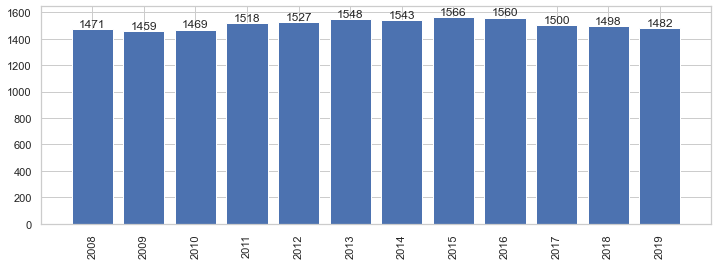

NOM_DISTRICTE : DISTRICT


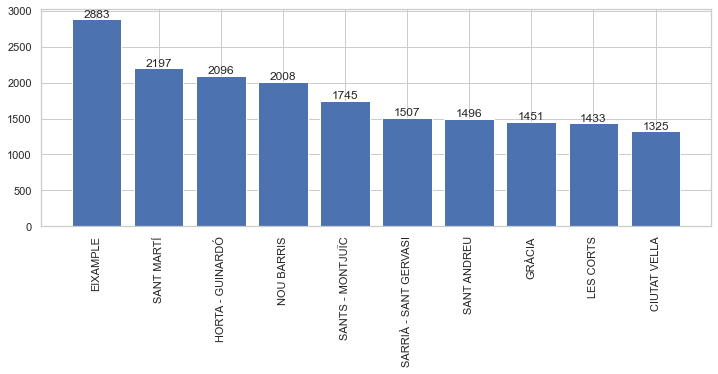

NOM_BARRI : BARRI


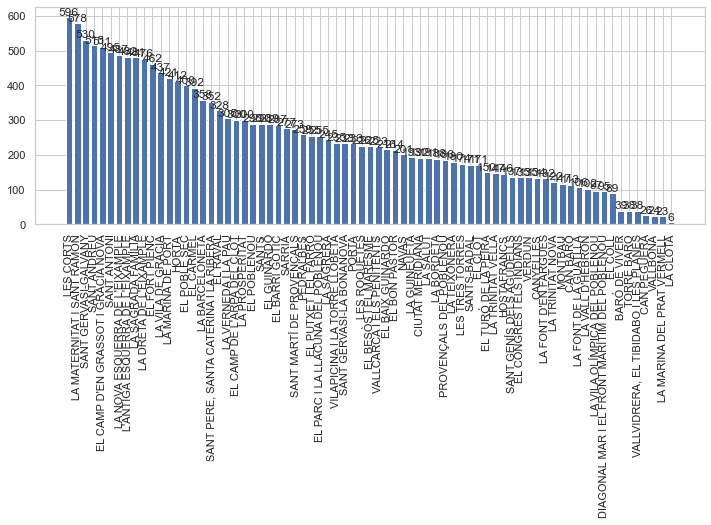

GRANBARRI : GRAN BARRI


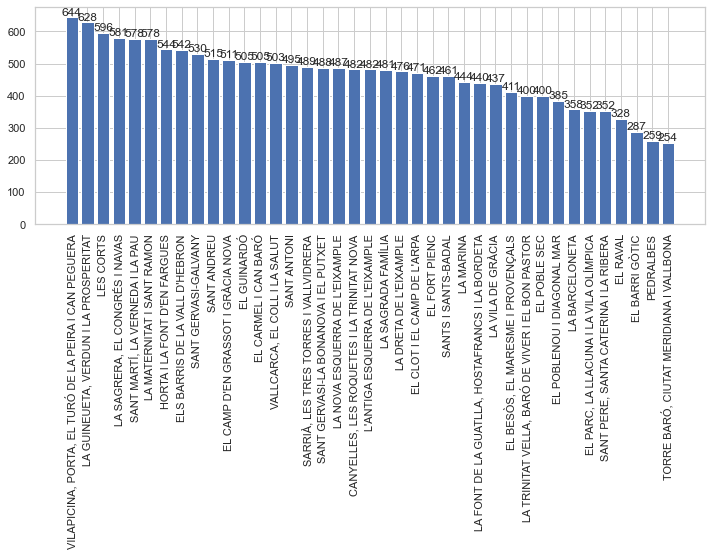

SEXE : SEX


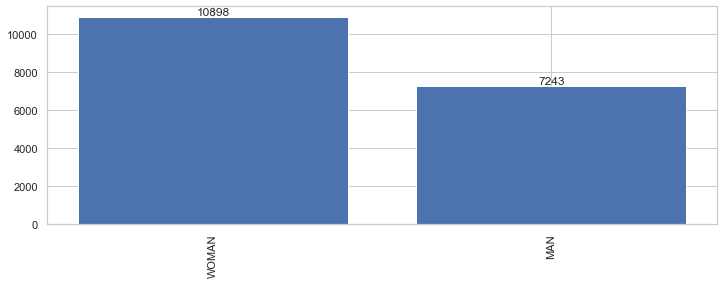

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


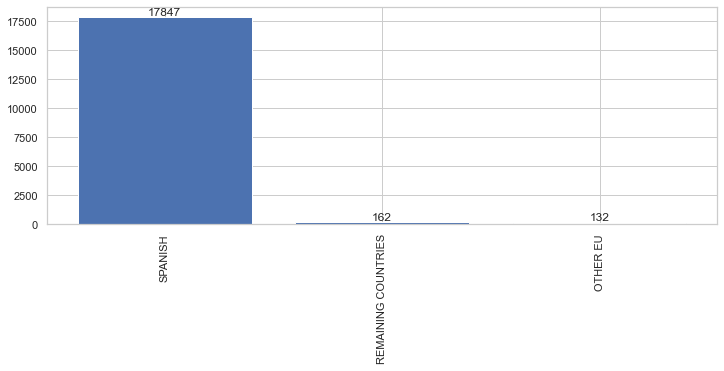

LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


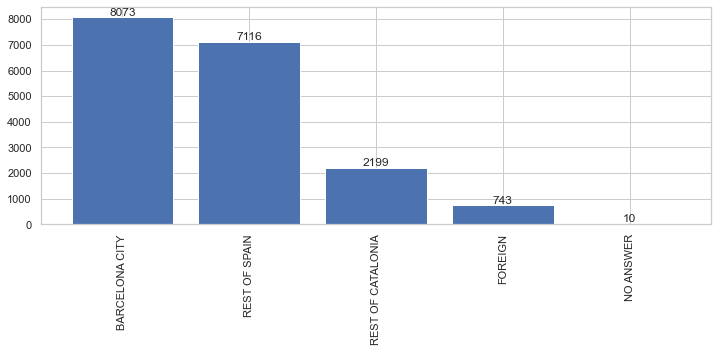

LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


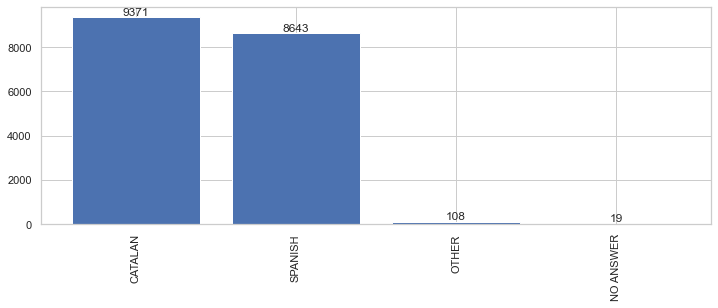

SENTPERTI : BELONGING - SPANISH VS CATALAN


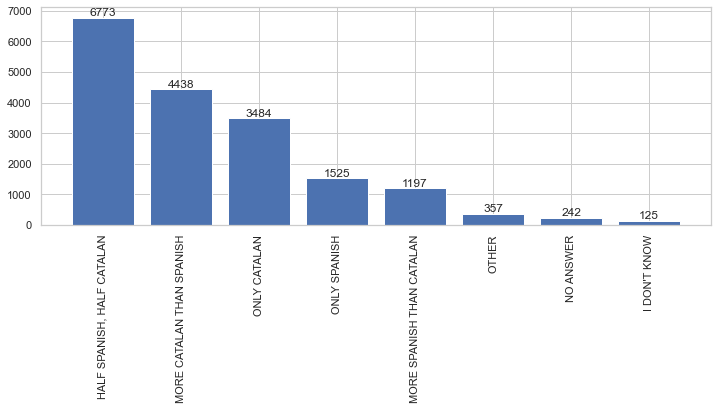

ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


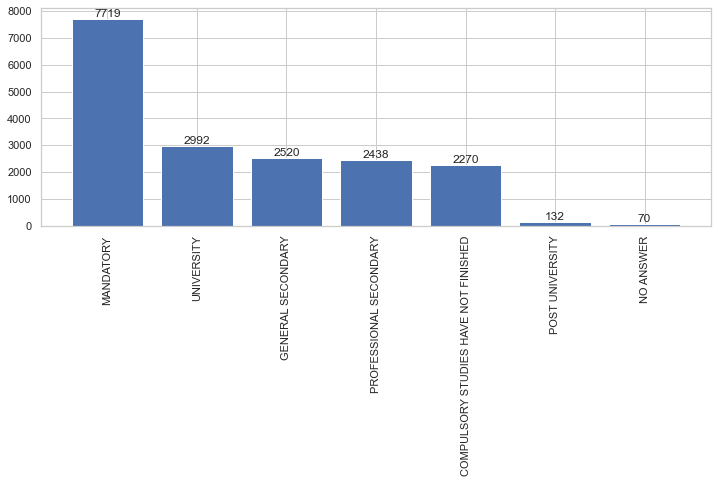

In [54]:
for i in var_list:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [55]:
for i in var_list:
    print(i, ":", questions_dict[i])
    display(size_pctg(i))

ANY : SURVEY YEAR


ANY
2008    8.11
2009    8.04
2010    8.10
2011    8.37
2012    8.42
2013    8.53
2014    8.51
2015    8.63
2016    8.60
2017    8.27
2018    8.26
2019    8.17
dtype: float64

NOM_DISTRICTE : DISTRICT


NOM_DISTRICTE
CIUTAT VELLA              7.30
EIXAMPLE                 15.89
GRÀCIA                    8.00
HORTA - GUINARDÓ         11.55
LES CORTS                 7.90
NOU BARRIS               11.07
SANT ANDREU               8.25
SANT MARTÍ               12.11
SANTS - MONTJUÏC          9.62
SARRIÀ - SANT GERVASI     8.31
dtype: float64

NOM_BARRI : BARRI


NOM_BARRI
BARÓ DE VIVER                            0.21
CAN BARÓ                                 0.62
CAN PEGUERA                              0.14
CANYELLES                                0.74
CIUTAT MERIDIANA                         1.06
                                         ... 
VALLBONA                                 0.13
VALLCARCA I ELS PENITENTS                1.23
VALLVIDRERA, EL TIBIDABO I LES PLANES    0.21
VERDUN                                   0.74
VILAPICINA I LA TORRE LLOBETA            1.30
Length: 73, dtype: float64

GRANBARRI : GRAN BARRI


GRANBARRI
CANYELLES, LES ROQUETES I LA TRINITAT NOVA              2.66
EL BARRI GÒTIC                                          1.58
EL BESÒS, EL MARESME I PROVENÇALS                       2.27
EL CAMP D'EN GRASSOT I GRÀCIA NOVA                      2.82
EL CARMEL I CAN BARÓ                                    2.78
EL CLOT I EL CAMP DE L'ARPA                             2.60
EL FORT PIENC                                           2.55
EL GUINARDÓ                                             2.78
EL PARC, LA LLACUNA I LA VILA OLÍMPICA                  1.94
EL POBLE SEC                                            2.20
EL POBLENOU I DIAGONAL MAR                              2.12
EL RAVAL                                                1.81
ELS BARRIS DE LA VALL D'HEBRON                          2.99
HORTA I LA FONT D'EN FARGUES                            3.00
L'ANTIGA ESQUERRA DE L'EIXAMPLE                         2.66
LA BARCELONETA                                          1.97
LA DRETA DE L'

SEXE : SEX


SEXE
MAN      39.93
WOMAN    60.07
dtype: float64

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


NACIO_ACT_UE
OTHER EU                0.73
REMAINING COUNTRIES     0.89
SPANISH                98.38
dtype: float64

LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


LLOC_NAIX_1A4
BARCELONA CITY       44.50
FOREIGN               4.10
NO ANSWER             0.06
REST OF CATALONIA    12.12
REST OF SPAIN        39.23
dtype: float64

LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


LLENGUA_HAB
CATALAN      51.66
NO ANSWER     0.10
OTHER         0.60
SPANISH      47.64
dtype: float64

SENTPERTI : BELONGING - SPANISH VS CATALAN


SENTPERTI
HALF SPANISH, HALF CATALAN    37.34
I DON'T KNOW                   0.69
MORE CATALAN THAN SPANISH     24.46
MORE SPANISH THAN CATALAN      6.60
NO ANSWER                      1.33
ONLY CATALAN                  19.21
ONLY SPANISH                   8.41
OTHER                          1.97
dtype: float64

ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


ESTUDIS_1A6
COMPULSORY STUDIES HAVE NOT FINISHED    12.51
GENERAL SECONDARY                       13.89
MANDATORY                               42.55
NO ANSWER                                0.39
POST UNIVERSITY                          0.73
PROFESSIONAL SECONDARY                  13.44
UNIVERSITY                              16.49
dtype: float64

In [56]:
for i in var_list:
    print(i, ":", questions_dict[i])
    display(ctab(i))

ANY : SURVEY YEAR


Would_live_in_another_neighborhood,0.0,1.0
ANY,,
2008,1185,123
2009,1172,117
2010,1168,140
2011,1131,145
2012,1149,146
2013,1204,154
2014,1195,130
2015,1225,144
2016,1245,142


NOM_DISTRICTE : DISTRICT


Would_live_in_another_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,918,199
EIXAMPLE,2357,193
GRÀCIA,1186,104
HORTA - GUINARDÓ,1606,218
LES CORTS,1251,59
NOU BARRIS,1413,249
SANT ANDREU,1135,176
SANT MARTÍ,1674,202
SANTS - MONTJUÏC,1206,243


NOM_BARRI : BARRI


Would_live_in_another_neighborhood,0.0,1.0
NOM_BARRI,,
BARÓ DE VIVER,22,9
CAN BARÓ,79,19
CAN PEGUERA,20,3
CANYELLES,102,8
CIUTAT MERIDIANA,76,39
...,...,...
VALLBONA,8,5
VALLCARCA I ELS PENITENTS,179,20
"VALLVIDRERA, EL TIBIDABO I LES PLANES",32,2


GRANBARRI : GRAN BARRI


Would_live_in_another_neighborhood,0.0,1.0
GRANBARRI,,
"CANYELLES, LES ROQUETES I LA TRINITAT NOVA",328,71
EL BARRI GÒTIC,214,32
"EL BESÒS, EL MARESME I PROVENÇALS",279,47
EL CAMP D'EN GRASSOT I GRÀCIA NOVA,424,31
EL CARMEL I CAN BARÓ,347,78
EL CLOT I EL CAMP DE L'ARPA,358,41
EL FORT PIENC,365,36
EL GUINARDÓ,382,54
"EL PARC, LA LLACUNA I LA VILA OLÍMPICA",273,32


SEXE : SEX


Would_live_in_another_neighborhood,0.0,1.0
SEXE,,
MAN,5452,628
WOMAN,8571,1073


NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


Would_live_in_another_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,111,8
REMAINING COUNTRIES,125,19
SPANISH,13787,1674


LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


Would_live_in_another_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,6251,821
FOREIGN,577,79
NO ANSWER,9,1
REST OF CATALONIA,1726,173
REST OF SPAIN,5460,627


LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


Would_live_in_another_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,7377,856
NO ANSWER,13,1
OTHER,76,17
SPANISH,6557,827


SENTPERTI : BELONGING - SPANISH VS CATALAN


Would_live_in_another_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",5292,623
I DON'T KNOW,94,10
MORE CATALAN THAN SPANISH,3480,423
MORE SPANISH THAN CATALAN,872,119
NO ANSWER,186,19
ONLY CATALAN,2714,332
ONLY SPANISH,1121,135
OTHER,264,40


ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


Would_live_in_another_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,1765,191
GENERAL SECONDARY,1908,251
MANDATORY,6046,709
NO ANSWER,51,10
POST UNIVERSITY,96,11
PROFESSIONAL SECONDARY,1862,244
UNIVERSITY,2295,285


Questions to be used in the model: 
```
NOM_DISTRICTE, SEXE, LLOC_NAIX_1A4
``` 
Other questions will be used in statistical description of the sample.

In [57]:
# DISTRICT
x = 'NOM_DISTRICTE'
data[x].unique()

array(['CIUTAT VELLA', 'EIXAMPLE', 'SANTS - MONTJUÏC', 'LES CORTS',
       'SARRIÀ - SANT GERVASI', 'GRÀCIA', 'HORTA - GUINARDÓ',
       'NOU BARRIS', 'SANT ANDREU', 'SANT MARTÍ'], dtype=object)

In [58]:
data['District'] = data[x]

In [59]:
# GENDER
x='SEXE'
data[x].unique()

array(['WOMAN', 'MAN'], dtype=object)

In [60]:
data_prep = {'WOMAN': 1,
            'MAN': 0}
data['Gender'] = [data_prep[i] for i in data[x]]

In [61]:
# PLACE OF BIRTH
x='LLOC_NAIX_1A4'
data[x].unique()

array(['BARCELONA CITY', 'REST OF SPAIN', 'REST OF CATALONIA', 'FOREIGN',
       'NO ANSWER'], dtype=object)

In [62]:
data_prep = {'REST OF SPAIN': 'REST OF SPAIN', 
             'BARCELONA CITY': 'BARCELONA', 
             'REST OF CATALONIA': 'REST OF CATALONIA', 
             'FOREIGN': 'FOREIGN',
             'NO ANSWER': np.nan}
data['Place_of_birth'] = [data_prep[i] for i in data[x]]

#### City and neighborhood

In [63]:
var_list = ['TMP_RES_BCN_1A6', 'TMP_RES_BARRI_1A6', 'EVO1A_BCN', 'EVO1A_BARRI', 'FUTUR_BCN', 'FUTUR_BARRI',
           'SATISF_RES_BCN_0A10', 'SATISF_RES_BARRI_0A10', 'VAL_SEGUR', 'VAL_SEGUR_BARRI', 
            'VAL_GESTMUNI', 'VAL_GESTBARRI', 'COMPARA_BARRI']

TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?


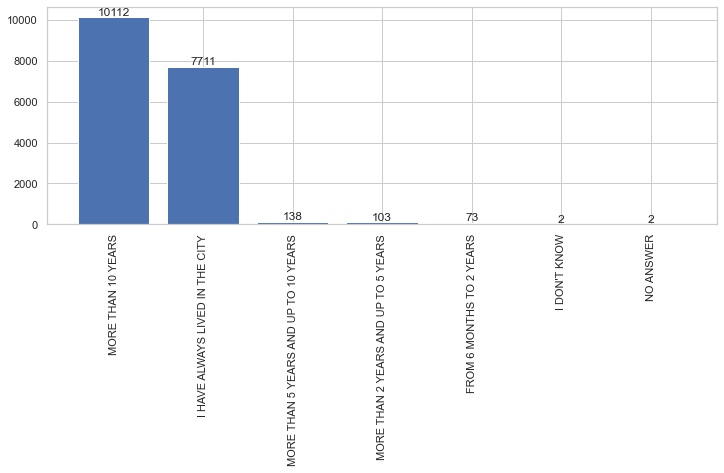

TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


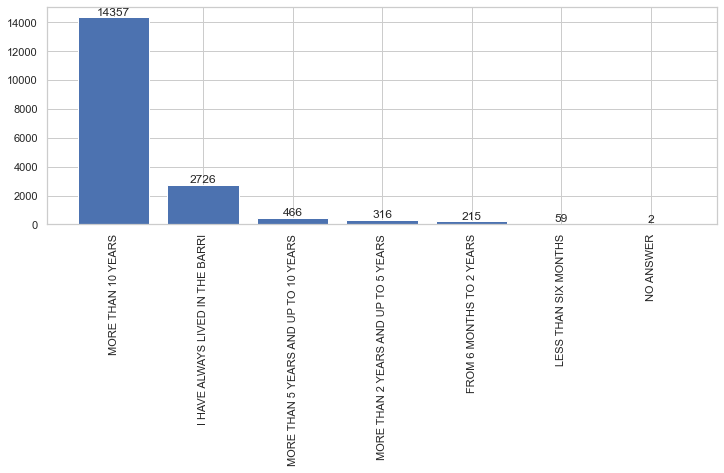

EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


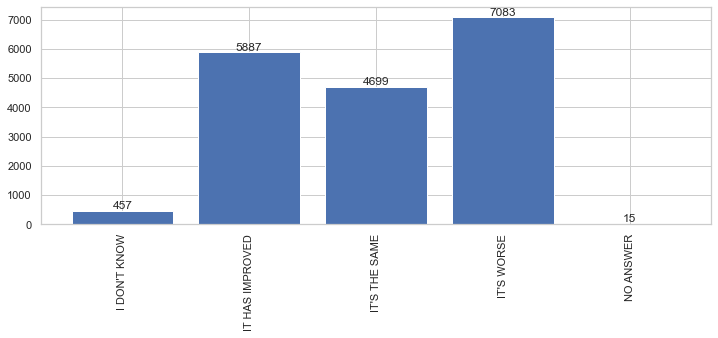

EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


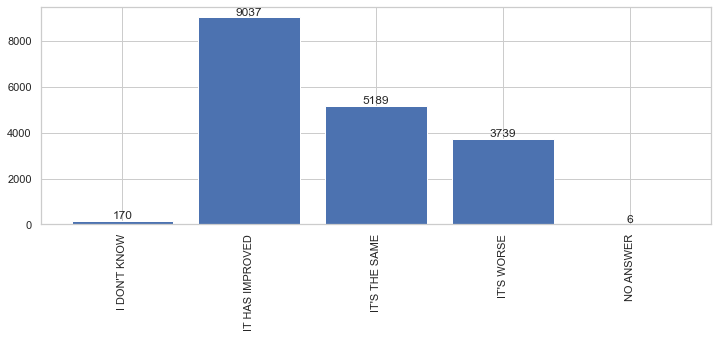

FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?


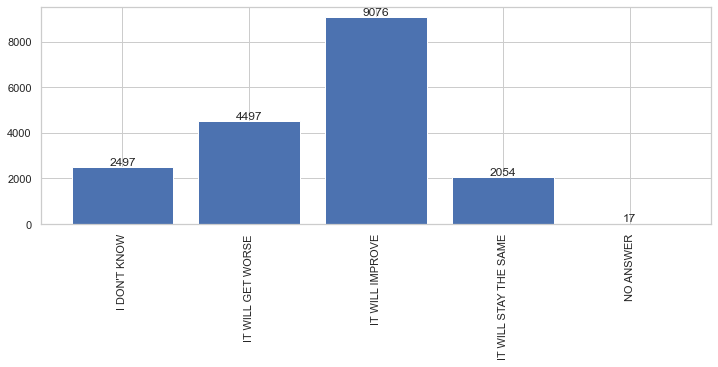

FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?


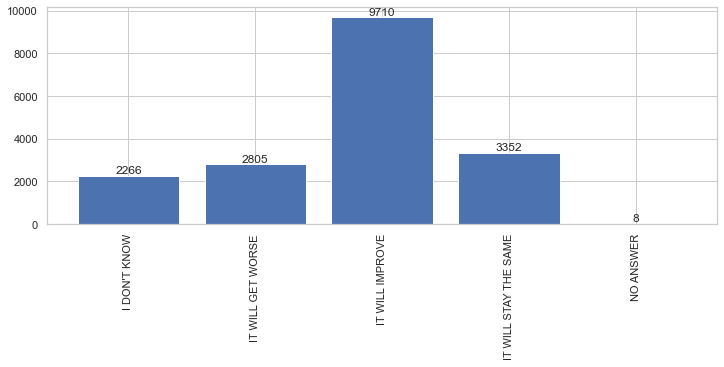

SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


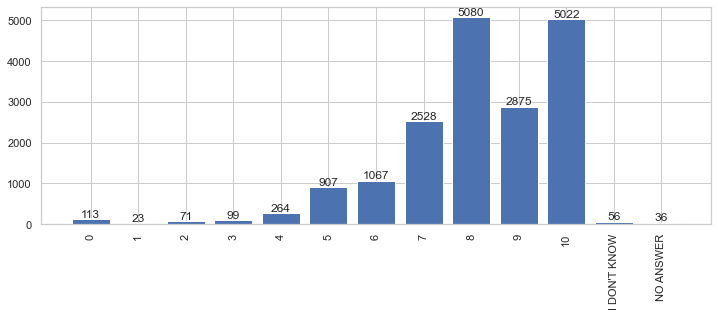

SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


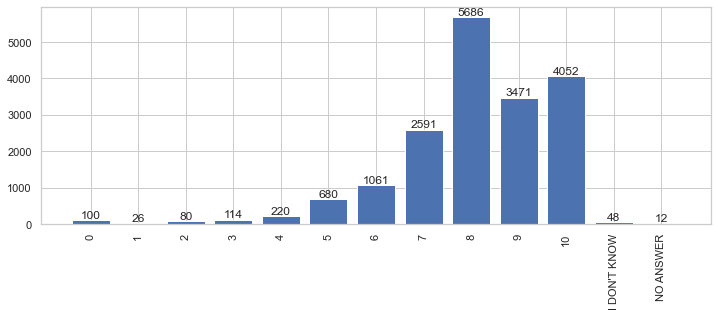

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


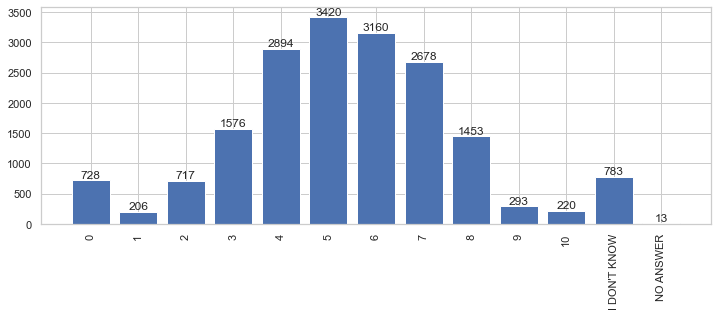

VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


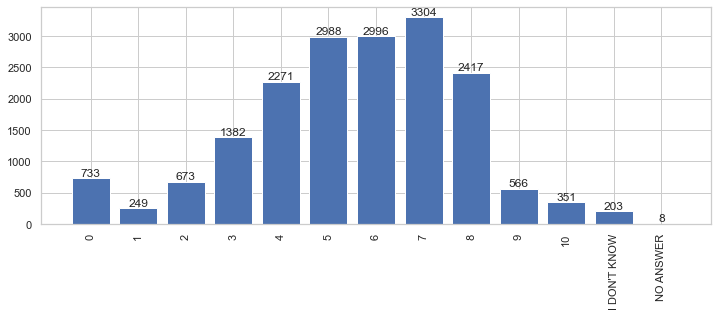

VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


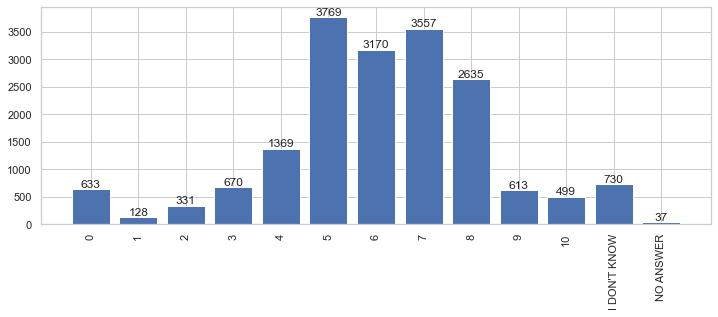

VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


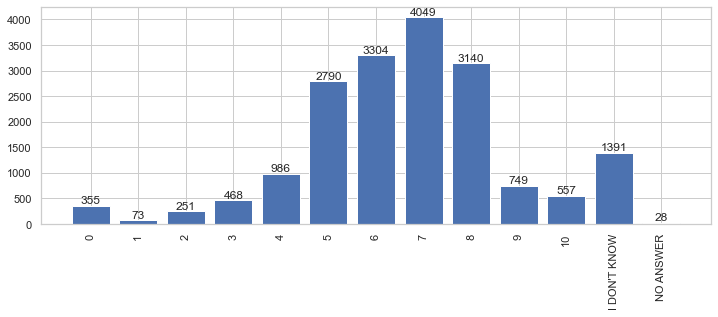

COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


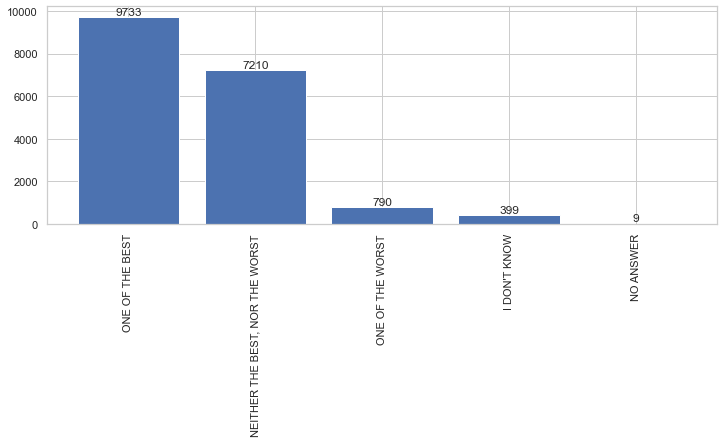

In [64]:
for i in var_list:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [65]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(size_pctg(i))


 TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?


TMP_RES_BCN_1A6
FROM 6 MONTHS TO 2 YEARS                 0.40
I DON'T KNOW                             0.01
I HAVE ALWAYS LIVED IN THE CITY         42.51
MORE THAN 10 YEARS                      55.74
MORE THAN 2 YEARS AND UP TO 5 YEARS      0.57
MORE THAN 5 YEARS AND UP TO 10 YEARS     0.76
NO ANSWER                                0.01
dtype: float64


 TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


TMP_RES_BARRI_1A6
FROM 6 MONTHS TO 2 YEARS                 1.19
I HAVE ALWAYS LIVED IN THE BARRI        15.03
LESS THAN SIX MONTHS                     0.33
MORE THAN 10 YEARS                      79.14
MORE THAN 2 YEARS AND UP TO 5 YEARS      1.74
MORE THAN 5 YEARS AND UP TO 10 YEARS     2.57
NO ANSWER                                0.01
dtype: float64


 EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


EVO1A_BCN
I DON'T KNOW        2.52
IT HAS IMPROVED    32.45
IT'S THE SAME      25.90
IT'S WORSE         39.04
NO ANSWER           0.08
dtype: float64


 EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


EVO1A_BARRI
I DON'T KNOW        0.94
IT HAS IMPROVED    49.82
IT'S THE SAME      28.60
IT'S WORSE         20.61
NO ANSWER           0.03
dtype: float64


 FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?


FUTUR_BCN
I DON'T KNOW             13.76
IT WILL GET WORSE        24.79
IT WILL IMPROVE          50.03
IT WILL STAY THE SAME    11.32
NO ANSWER                 0.09
dtype: float64


 FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?


FUTUR_BARRI
I DON'T KNOW             12.49
IT WILL GET WORSE        15.46
IT WILL IMPROVE          53.53
IT WILL STAY THE SAME    18.48
NO ANSWER                 0.04
dtype: float64


 SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


SATISF_RES_BCN_0A10
0                0.62
1                0.13
2                0.39
3                0.55
4                1.46
5                5.00
6                5.88
7               13.94
8               28.00
9               15.85
10              27.68
I DON'T KNOW     0.31
NO ANSWER        0.20
dtype: float64


 SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


SATISF_RES_BARRI_0A10
0                0.55
1                0.14
2                0.44
3                0.63
4                1.21
5                3.75
6                5.85
7               14.28
8               31.34
9               19.13
10              22.34
I DON'T KNOW     0.26
NO ANSWER        0.07
dtype: float64


 VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


VAL_SEGUR
0                4.01
1                1.14
2                3.95
3                8.69
4               15.95
5               18.85
6               17.42
7               14.76
8                8.01
9                1.62
10               1.21
I DON'T KNOW     4.32
NO ANSWER        0.07
dtype: float64


 VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


VAL_SEGUR_BARRI
0                4.04
1                1.37
2                3.71
3                7.62
4               12.52
5               16.47
6               16.52
7               18.21
8               13.32
9                3.12
10               1.93
I DON'T KNOW     1.12
NO ANSWER        0.04
dtype: float64


 VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


VAL_GESTMUNI
0                3.49
1                0.71
2                1.82
3                3.69
4                7.55
5               20.78
6               17.47
7               19.61
8               14.53
9                3.38
10               2.75
I DON'T KNOW     4.02
NO ANSWER        0.20
dtype: float64


 VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


VAL_GESTBARRI
0                1.96
1                0.40
2                1.38
3                2.58
4                5.44
5               15.38
6               18.21
7               22.32
8               17.31
9                4.13
10               3.07
I DON'T KNOW     7.67
NO ANSWER        0.15
dtype: float64


 COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


COMPARA_BARRI
I DON'T KNOW                        2.20
NEITHER THE BEST, NOR THE WORST    39.74
NO ANSWER                           0.05
ONE OF THE BEST                    53.65
ONE OF THE WORST                    4.35
dtype: float64

In [66]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(ctab(i))


 TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,48,13
I DON'T KNOW,2,0
I HAVE ALWAYS LIVED IN THE CITY,5997,785
MORE THAN 10 YEARS,7802,879
MORE THAN 2 YEARS AND UP TO 5 YEARS,76,11
MORE THAN 5 YEARS AND UP TO 10 YEARS,96,13
NO ANSWER,2,0



 TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,142,40
I HAVE ALWAYS LIVED IN THE BARRI,2252,183
LESS THAN SIX MONTHS,38,11
MORE THAN 10 YEARS,11075,1320
MORE THAN 2 YEARS AND UP TO 5 YEARS,198,67
MORE THAN 5 YEARS AND UP TO 10 YEARS,316,80
NO ANSWER,2,0



 EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,350,31
IT HAS IMPROVED,4819,462
IT'S THE SAME,3780,390
IT'S WORSE,5065,817
NO ANSWER,9,1



 EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,114,23
IT HAS IMPROVED,7394,680
IT'S THE SAME,4130,434
IT'S WORSE,2379,564
NO ANSWER,6,0



 FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1899,233
IT WILL GET WORSE,3186,506
IT WILL IMPROVE,7311,757
IT WILL STAY THE SAME,1616,203
NO ANSWER,11,2



 FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1686,221
IT WILL GET WORSE,1718,461
IT WILL IMPROVE,7967,723
IT WILL STAY THE SAME,2645,296
NO ANSWER,7,0



 SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,52,8
1,11,2
2,21,6
3,42,10
4,121,42
5,513,125
6,716,116
7,1866,260
8,4016,479



 SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,16,37
1,9,7
2,11,33
3,20,42
4,56,78
5,279,171
6,609,194
7,1848,323
8,4534,465



 VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,469,88
1,130,24
2,488,91
3,1160,160
4,2191,298
5,2676,320
6,2538,264
7,2173,217
8,1167,113



 VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,438,100
1,131,42
2,430,117
3,981,185
4,1681,241
5,2306,268
6,2412,241
7,2719,257
8,2009,175



 VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,418,68
1,73,20
2,213,41
3,478,60
4,968,164
5,2825,397
6,2468,315
7,2900,275
8,2150,219



 VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,192,59
1,41,18
2,127,40
3,282,67
4,650,128
5,1963,334
6,2577,306
7,3331,330
8,2684,190



 COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


Would_live_in_another_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,286,43
"NEITHER THE BEST, NOR THE WORST",4929,1013
NO ANSWER,4,2
ONE OF THE BEST,8531,364
ONE OF THE WORST,273,279


Questions to be used in the model:
```
TMP_RES_BARRI_1A6, 
EVO1A_BCN, EVO1A_BARRI, 
FUTUR_BCN, FUTUR_BARRI, 
SATISF_RES_BCN_0A10, SATISF_RES_BARRI_0A10, 
VAL_SEGUR, VAL_SEGUR_BARRI,
VAL_GESTMUNI, VAL_GESTBARRI, 
COMPARA_BARRI, 
MUNI_VOTAR
```
Other questions will be used in statistical description of the sample.

In [67]:
# HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
x = 'TMP_RES_BARRI_1A6'
data[x].unique()

array(['I HAVE ALWAYS LIVED IN THE BARRI', 'MORE THAN 10 YEARS',
       'FROM 6 MONTHS TO 2 YEARS', 'MORE THAN 5 YEARS AND UP TO 10 YEARS',
       'MORE THAN 2 YEARS AND UP TO 5 YEARS', 'LESS THAN SIX MONTHS',
       'NO ANSWER'], dtype=object)

In [68]:
data_prep = {'I HAVE ALWAYS LIVED IN THE BARRI': 'I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS',
             'LESS THAN SIX MONTHS': 'LESS THAN 10 YEARS',
             'NO ANSWER': np.nan}
data['Time_living_in_barri'] = [data_prep[i] for i in data[x]]

In [69]:
# DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
x = 'EVO1A_BARRI'
data[x].unique()

array(["IT'S THE SAME", "IT'S WORSE", 'IT HAS IMPROVED', "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [70]:
data_prep = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "I DON'T KNOW",
             'NO ANSWER': np.nan}
data['Barri_evolution'] = [data_prep[i] for i in data[x]]

In [71]:
# DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
x = 'EVO1A_BCN'
data[x].unique()

array(["IT'S WORSE", 'IT HAS IMPROVED', "IT'S THE SAME", "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [72]:
data_prep = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "I DON'T KNOW",
             'NO ANSWER': np.nan}
data['BCN_evolution'] = [data_prep[i] for i in data[x]]

In [73]:
# AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
x = 'FUTUR_BARRI'
data[x].unique()

array(['IT WILL STAY THE SAME', 'IT WILL IMPROVE', 'IT WILL GET WORSE',
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [74]:
data_prep = {'IT WILL GET WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['Barri_future'] = [data_prep[i] for i in data[x]]

In [75]:
# AND FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
x = 'FUTUR_BCN'
data[x].unique()

array(['IT WILL GET WORSE', 'IT WILL IMPROVE', 'IT WILL STAY THE SAME',
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [76]:
data_prep = {'IT WILL GET WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['BCN_future'] = [data_prep[i] for i in data[x]]

In [77]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
x = 'SATISF_RES_BARRI_0A10'
data[x].unique()

array([7, 4, 8, 6, 10, 9, 3, 5, 0, 2, 'NO ANSWER', "I DON'T KNOW", 1],
      dtype=object)

In [78]:
# data_prep = {0: 'NOT SATISFIED',
#              1: 'NOT SATISFIED',
#              2: 'NOT SATISFIED',
#              3: 'NOT SATISFIED',
#              4: 'NOT SATISFIED',
#              5: 'SATISFIED',
#              6: 'SATISFIED', 
#              7: 'SATISFIED',
#              8: 'SATISFIED',
#              9: 'SATISFIED', 
#              10: 'SATISFIED',  
#              "I DON'T KNOW": "I DON'T KNOW", 
#              'NO ANSWER': np.nan}
# data['Barri_satisfaction_of_living'] = [data_prep[i] for i in data[x]]

In [79]:
data_prep = {0: 'NOT SATISFIED',
             1: 'NOT SATISFIED',
             2: 'NOT SATISFIED',
             3: 'NOT SATISFIED',
             4: 'FAIRLY SATISFIED',
             5: 'FAIRLY SATISFIED',
             6: 'FAIRLY SATISFIED', 
             7: 'SATISFIED',
             8: 'SATISFIED',
             9: 'SATISFIED', 
             10: 'SATISFIED',  
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['Barri_satisfaction_of_living'] = [data_prep[i] for i in data[x]]

In [80]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN BARCELONA?
x = 'SATISF_RES_BCN_0A10'
data[x].unique()

array([8, 7, 10, 9, 6, 3, 5, 'NO ANSWER', 2, 1, 0, "I DON'T KNOW", 4],
      dtype=object)

In [81]:
data_prep = {0: 'NOT SATISFIED',
             1: 'NOT SATISFIED',
             2: 'NOT SATISFIED',
             3: 'NOT SATISFIED',
             4: 'FAIRLY SATISFIED',
             5: 'FAIRLY SATISFIED',
             6: 'FAIRLY SATISFIED', 
             7: 'SATISFIED',
             8: 'SATISFIED',
             9: 'SATISFIED', 
             10: 'SATISFIED',  
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['BCN_satisfaction_of_living'] = [data_prep[i] for i in data[x]]

In [82]:
# CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD
x = 'VAL_SEGUR_BARRI'
data[x].unique()

array([5, 6, 7, 2, 4, 3, 8, 10, 1, 0, 9, "I DON'T KNOW", 'NO ANSWER'],
      dtype=object)

In [83]:
# data_prep = {0: 'BAD',
#              1: 'BAD',
#              2: 'BAD',
#              3: 'BAD',
#              4: 'BAD',
#              5: 'GOOD',
#              6: 'GOOD', 
#              7: 'GOOD',
#              8: 'GOOD',
#              9: 'GOOD', 
#              10: 'GOOD',  
#              "I DON'T KNOW": "I DON'T KNOW", 
#              'NO ANSWER': np.nan}
# data['Barri_citizen_security'] = [data_prep[i] for i in data[x]]

In [84]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['Barri_citizen_security'] = [data_prep[i] for i in data[x]]

In [85]:
# CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE
x = 'VAL_SEGUR'
data[x].unique()

array([5, 6, 7, 2, 4, 3, 8, 0, 1, 10, 9, "I DON'T KNOW", 'NO ANSWER'],
      dtype=object)

In [86]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['BCN_citizen_security'] = [data_prep[i] for i in data[x]]

In [87]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?
x = 'VAL_GESTBARRI'
data[x].unique()

array([6, 7, 8, 9, 5, "I DON'T KNOW", 3, 10, 4, 2, 'NO ANSWER', 0, 1],
      dtype=object)

In [88]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['Barri_management'] = [data_prep[i] for i in data[x]]

In [89]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
x = 'VAL_GESTMUNI'
data[x].unique()

array([7, 6, 4, 5, 10, 8, "I DON'T KNOW", 9, 2, 3, 'NO ANSWER', 0, 1],
      dtype=object)

In [90]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['BCN_management'] = [data_prep[i] for i in data[x]]

In [91]:
# DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
x = 'COMPARA_BARRI'
data[x].unique()

array(['NEITHER THE BEST, NOR THE WORST', 'ONE OF THE WORST',
       'ONE OF THE BEST', "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [92]:
data_prep = {'NEITHER THE BEST, NOR THE WORST': 'NEITHER THE BEST, NOR THE WORST', 
             'ONE OF THE BEST': 'ONE OF THE BEST',
             'ONE OF THE WORST': 'ONE OF THE WORST', 
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
data['Barri_comparison'] = [data_prep[i] for i in data[x]]

#### City services

In [93]:
var_list = ['VAL_NETEJA', 'VAL_SOROLL', 'VAL_VERD', 'VAL_ENLLUM', 'VAL_URBA', 'VAL_ASFALT', 
            'VAL_CIRCUL', 'VAL_APARCA', 'VAL_BUS', 'VAL_METRO', 'VAL_MERCAT']

VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


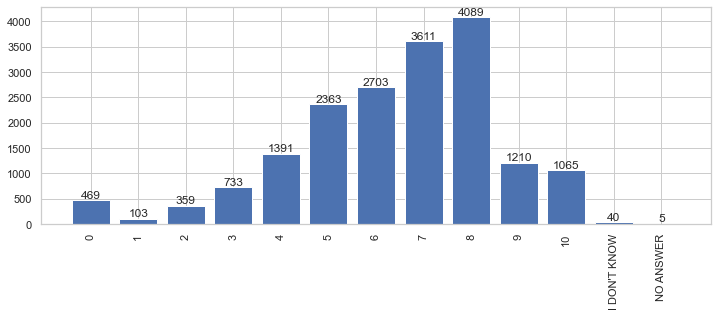

VAL_SOROLL : CITY SERVICES - RATE: NOISE


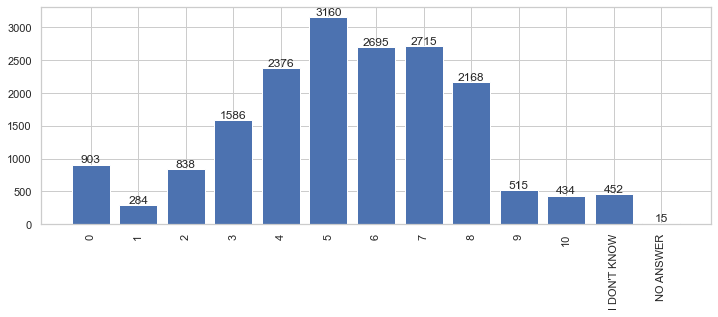

VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


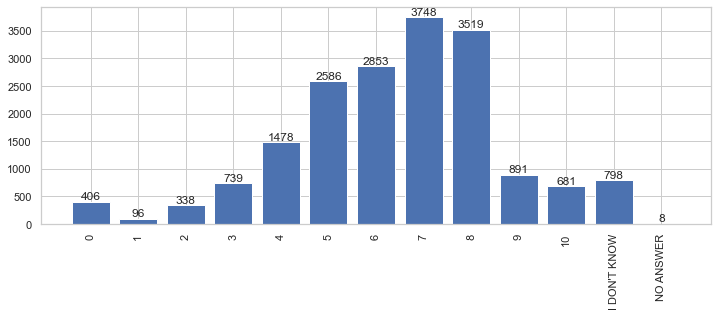

VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


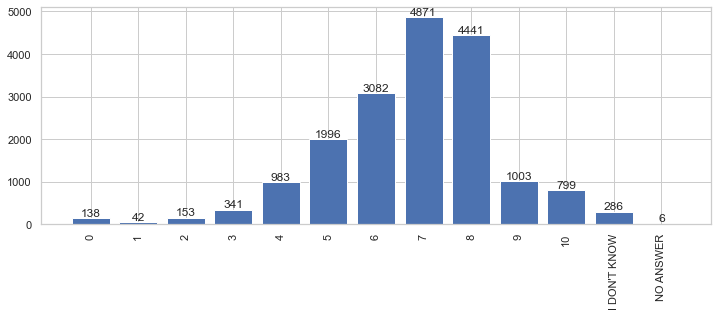

VAL_URBA : CITY SERVICES - RATE: URBANISM


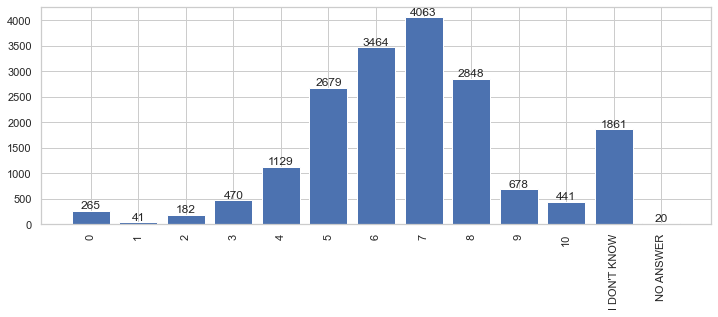

VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


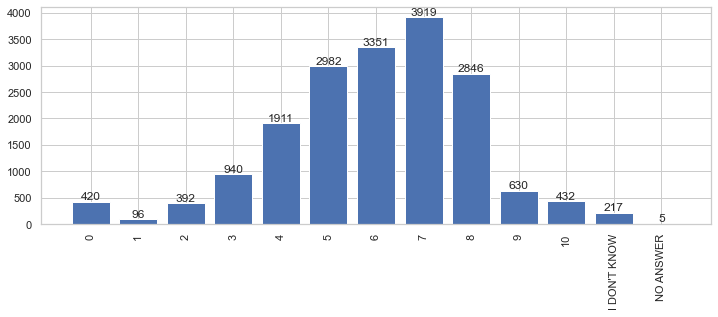

VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION


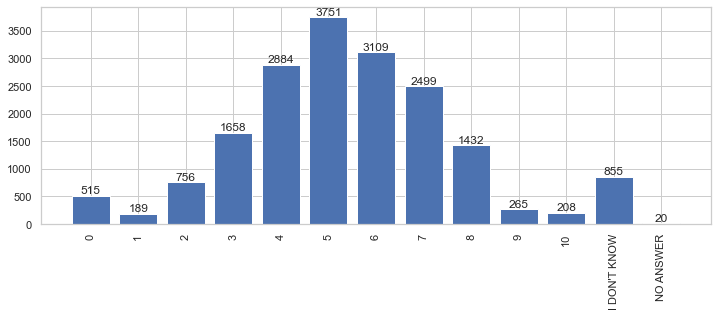

VAL_APARCA : CITY SERVICES - RATE: PARKING


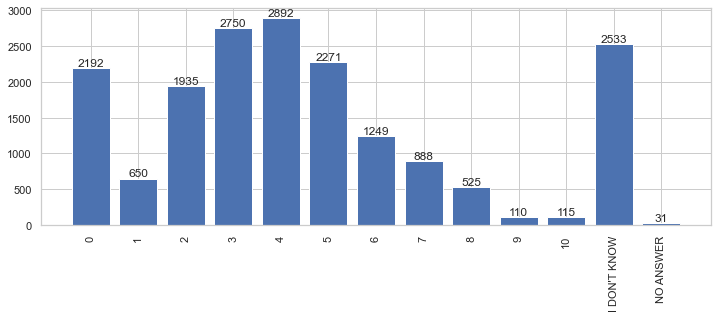

VAL_BUS : CITY SERVICES - RATE: BUS


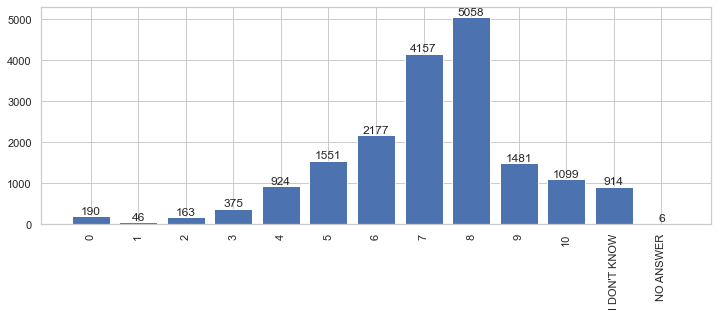

VAL_METRO : CITY SERVICES - RATE: SUBWAY


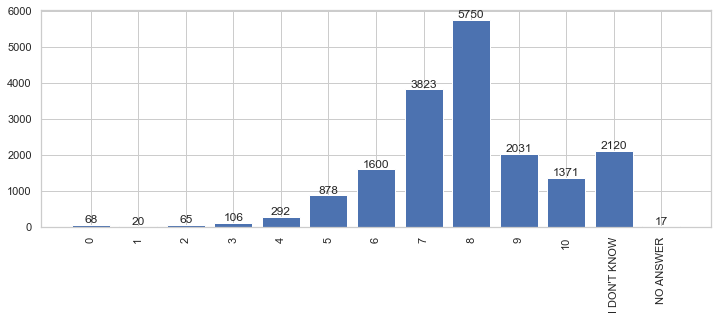

VAL_MERCAT : CITY SERVICES - RATE: MUNICIPAL MARKETS


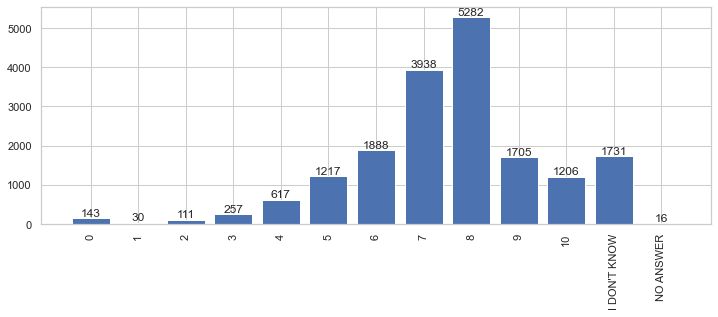

In [94]:
for i in var_list:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [95]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(size_pctg(i))


 VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


VAL_NETEJA
0                2.59
1                0.57
2                1.98
3                4.04
4                7.67
5               13.03
6               14.90
7               19.91
8               22.54
9                6.67
10               5.87
I DON'T KNOW     0.22
NO ANSWER        0.03
dtype: float64


 VAL_SOROLL : CITY SERVICES - RATE: NOISE


VAL_SOROLL
0                4.98
1                1.57
2                4.62
3                8.74
4               13.10
5               17.42
6               14.86
7               14.97
8               11.95
9                2.84
10               2.39
I DON'T KNOW     2.49
NO ANSWER        0.08
dtype: float64


 VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


VAL_VERD
0                2.24
1                0.53
2                1.86
3                4.07
4                8.15
5               14.26
6               15.73
7               20.66
8               19.40
9                4.91
10               3.75
I DON'T KNOW     4.40
NO ANSWER        0.04
dtype: float64


 VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


VAL_ENLLUM
0                0.76
1                0.23
2                0.84
3                1.88
4                5.42
5               11.00
6               16.99
7               26.85
8               24.48
9                5.53
10               4.40
I DON'T KNOW     1.58
NO ANSWER        0.03
dtype: float64


 VAL_URBA : CITY SERVICES - RATE: URBANISM


VAL_URBA
0                1.46
1                0.23
2                1.00
3                2.59
4                6.22
5               14.77
6               19.09
7               22.40
8               15.70
9                3.74
10               2.43
I DON'T KNOW    10.26
NO ANSWER        0.11
dtype: float64


 VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


VAL_ASFALT
0                2.32
1                0.53
2                2.16
3                5.18
4               10.53
5               16.44
6               18.47
7               21.60
8               15.69
9                3.47
10               2.38
I DON'T KNOW     1.20
NO ANSWER        0.03
dtype: float64


 VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION


VAL_CIRCUL
0                2.84
1                1.04
2                4.17
3                9.14
4               15.90
5               20.68
6               17.14
7               13.78
8                7.89
9                1.46
10               1.15
I DON'T KNOW     4.71
NO ANSWER        0.11
dtype: float64


 VAL_APARCA : CITY SERVICES - RATE: PARKING


VAL_APARCA
0               12.08
1                3.58
2               10.67
3               15.16
4               15.94
5               12.52
6                6.88
7                4.89
8                2.89
9                0.61
10               0.63
I DON'T KNOW    13.96
NO ANSWER        0.17
dtype: float64


 VAL_BUS : CITY SERVICES - RATE: BUS


VAL_BUS
0                1.05
1                0.25
2                0.90
3                2.07
4                5.09
5                8.55
6               12.00
7               22.91
8               27.88
9                8.16
10               6.06
I DON'T KNOW     5.04
NO ANSWER        0.03
dtype: float64


 VAL_METRO : CITY SERVICES - RATE: SUBWAY


VAL_METRO
0                0.37
1                0.11
2                0.36
3                0.58
4                1.61
5                4.84
6                8.82
7               21.07
8               31.70
9               11.20
10               7.56
I DON'T KNOW    11.69
NO ANSWER        0.09
dtype: float64


 VAL_MERCAT : CITY SERVICES - RATE: MUNICIPAL MARKETS


VAL_MERCAT
0                0.79
1                0.17
2                0.61
3                1.42
4                3.40
5                6.71
6               10.41
7               21.71
8               29.12
9                9.40
10               6.65
I DON'T KNOW     9.54
NO ANSWER        0.09
dtype: float64

In [96]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(ctab(i))


 VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


Would_live_in_another_neighborhood,0.0,1.0
VAL_NETEJA,,
0,301,62
1,66,15
2,242,49
3,516,90
4,1014,153
5,1793,242
6,2084,275
7,2884,295
8,3256,349



 VAL_SOROLL : CITY SERVICES - RATE: NOISE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SOROLL,,
0,549,128
1,181,45
2,573,99
3,1122,177
4,1788,243
5,2512,262
6,2171,221
7,2175,236
8,1789,174



 VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


Would_live_in_another_neighborhood,0.0,1.0
VAL_VERD,,
0,252,56
1,59,14
2,230,47
3,506,80
4,1049,185
5,1886,297
6,2192,273
7,3001,288
8,2866,296



 VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


Would_live_in_another_neighborhood,0.0,1.0
VAL_ENLLUM,,
0,97,16
1,29,5
2,93,27
3,228,50
4,706,114
5,1467,224
6,2411,267
7,3818,443
8,3496,384



 VAL_URBA : CITY SERVICES - RATE: URBANISM


Would_live_in_another_neighborhood,0.0,1.0
VAL_URBA,,
0,173,36
1,27,3
2,119,22
3,303,62
4,763,140
5,1978,295
6,2712,322
7,3288,332
8,2291,232



 VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


Would_live_in_another_neighborhood,0.0,1.0
VAL_ASFALT,,
0,278,51
1,65,10
2,263,48
3,638,109
4,1402,198
5,2236,325
6,2665,284
7,3148,342
8,2284,240



 VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION


Would_live_in_another_neighborhood,0.0,1.0
VAL_CIRCUL,,
0,341,55
1,116,24
2,544,73
3,1223,170
4,2198,291
5,2943,348
6,2431,304
7,1984,187
8,1164,139



 VAL_APARCA : CITY SERVICES - RATE: PARKING


Would_live_in_another_neighborhood,0.0,1.0
VAL_APARCA,,
0,1519,249
1,448,83
2,1455,194
3,2096,262
4,2282,244
5,1800,207
6,1016,114
7,736,55
8,432,41



 VAL_BUS : CITY SERVICES - RATE: BUS


Would_live_in_another_neighborhood,0.0,1.0
VAL_BUS,,
0,133,21
1,30,6
2,103,28
3,248,52
4,658,124
5,1117,170
6,1665,218
7,3262,366
8,3967,455



 VAL_METRO : CITY SERVICES - RATE: SUBWAY


Would_live_in_another_neighborhood,0.0,1.0
VAL_METRO,,
0,42,9
1,15,2
2,33,14
3,77,8
4,206,34
5,622,108
6,1215,158
7,2954,365
8,4454,542



 VAL_MERCAT : CITY SERVICES - RATE: MUNICIPAL MARKETS


Would_live_in_another_neighborhood,0.0,1.0
VAL_MERCAT,,
0,93,16
1,15,7
2,82,14
3,174,22
4,427,75
5,879,131
6,1404,205
7,3057,402
8,4158,454


Variables to be used in the model:
```
VAL_NETEJA, VAL_SOROLL, VAL_VERD, VAL_ENLLUM, VAL_URBA, VAL_ASFALT,
VAL_CIRCUL, VAL_APARCA, VAL_BUS, VAL_METRO, VAL_MERCAT
```
VAL_BICING, VAL_ESPORT, VAL_SIAC, VAL_CSS, VAL_CULT, VAL_FESTESPOP, VAL_BIBLIO are not taken into account as they have high ratio of "I DON'T KNOW" answers.


In [97]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "I DON'T KNOW", 
             'NO ANSWER': np.nan}
for x in var_list:
    data[questions_dict[x][22:]] = [data_prep[i] for i in data[x]]

#### Transport

In [98]:
var_list = ['TRANSP_MOU', 'VAL_TRANSP_1A5', 'VAL_TRANSP_BARRI_1A5', 'HAB_COTXE_PART']

TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


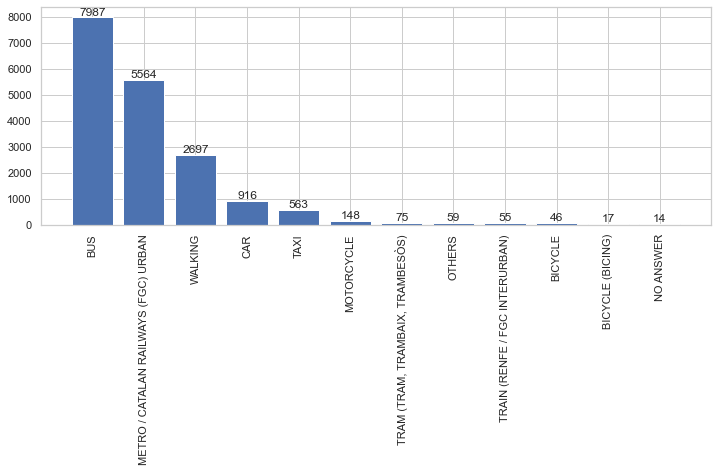

VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


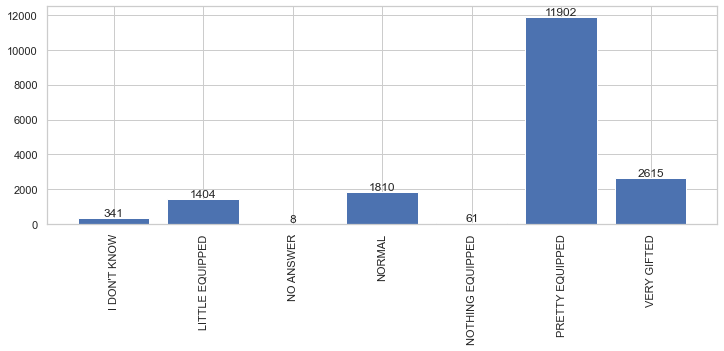

VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


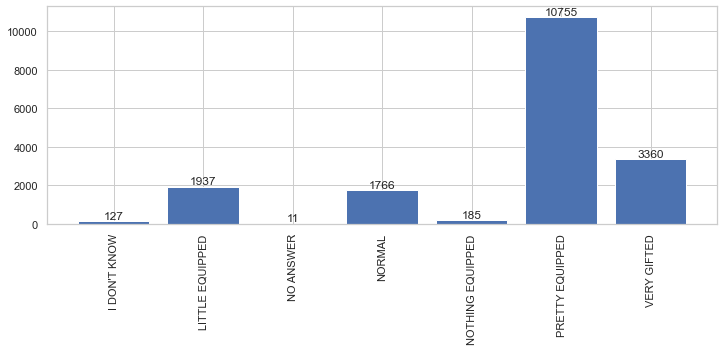

HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


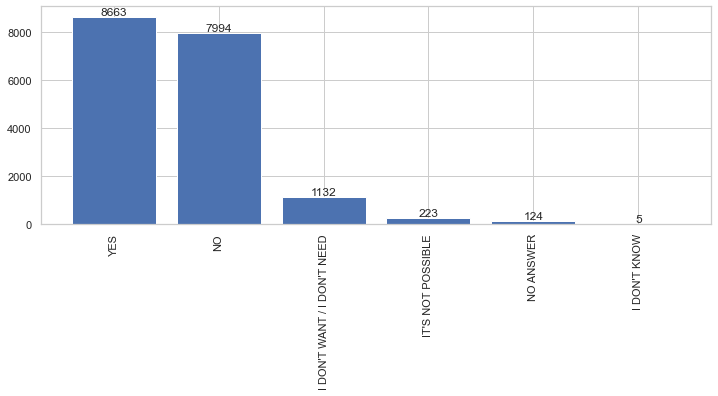

In [99]:
for i in var_list:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [100]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(size_pctg(i))


 TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


TRANSP_MOU
BICYCLE                                  0.25
BICYCLE (BICING)                         0.09
BUS                                     44.03
CAR                                      5.05
METRO / CATALAN RAILWAYS (FGC) URBAN    30.67
MOTORCYCLE                               0.82
NO ANSWER                                0.08
OTHERS                                   0.33
TAXI                                     3.10
TRAIN (RENFE / FGC INTERURBAN)           0.30
TRAM (TRAM, TRAMBAIX, TRAMBESÒS)         0.41
WALKING                                 14.87
dtype: float64


 VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


VAL_TRANSP_1A5
I DON'T KNOW         1.88
LITTLE EQUIPPED      7.74
NO ANSWER            0.04
NORMAL               9.98
NOTHING EQUIPPED     0.34
PRETTY EQUIPPED     65.61
VERY GIFTED         14.41
dtype: float64


 VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


VAL_TRANSP_BARRI_1A5
I DON'T KNOW         0.70
LITTLE EQUIPPED     10.68
NO ANSWER            0.06
NORMAL               9.73
NOTHING EQUIPPED     1.02
PRETTY EQUIPPED     59.29
VERY GIFTED         18.52
dtype: float64


 HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


HAB_COTXE_PART
I DON'T KNOW                    0.03
I DON'T WANT / I DON'T NEED     6.24
IT'S NOT POSSIBLE               1.23
NO                             44.07
NO ANSWER                       0.68
YES                            47.75
dtype: float64

In [101]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(ctab(i))


 TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


Would_live_in_another_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,34,6
BICYCLE (BICING),12,5
BUS,6157,805
CAR,691,73
METRO / CATALAN RAILWAYS (FGC) URBAN,4246,546
MOTORCYCLE,101,14
NO ANSWER,11,0
OTHERS,44,4
TAXI,481,41



 VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_1A5,,
I DON'T KNOW,266,32
LITTLE EQUIPPED,973,171
NO ANSWER,7,1
NORMAL,1349,181
NOTHING EQUIPPED,41,9
PRETTY EQUIPPED,9303,1097
VERY GIFTED,2084,210



 VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A5,,
I DON'T KNOW,101,9
LITTLE EQUIPPED,1374,249
NO ANSWER,10,1
NORMAL,1294,209
NOTHING EQUIPPED,123,32
PRETTY EQUIPPED,8402,939
VERY GIFTED,2719,262



 HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


Would_live_in_another_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,3,0
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO,6421,705
NO ANSWER,98,16
YES,6502,812


Variables to be used in the model:
```
VAL_TRANSP_1A5,
VAL_TRANSP_BARRI_1A5,
HAB_COTXE_PART
```
Other variables will be used in statistical description of the sample.

In [102]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED?
x = 'VAL_TRANSP_BARRI_1A5'
data[x].unique()

array(['PRETTY EQUIPPED', "I DON'T KNOW", 'NORMAL', 'LITTLE EQUIPPED',
       'NOTHING EQUIPPED', 'VERY GIFTED', 'NO ANSWER'], dtype=object)

In [103]:
data_prep = {'VERY GIFTED': 'GOOD', 
             'PRETTY EQUIPPED': 'GOOD', 
             'NORMAL': 'NEITHER BAD, NOR GOOD', 
             'LITTLE EQUIPPED': 'BAD', 
             'NOTHING EQUIPPED': 'BAD', 
             "I DON'T KNOW": "I DON'T KNOW",
             'NO ANSWER': np.nan}
data['Barri_transport'] = [data_prep[i] for i in data['VAL_TRANSP_BARRI_1A5']]

In [104]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED?
x = 'VAL_TRANSP_1A5'
data[x].unique()

array(['PRETTY EQUIPPED', "I DON'T KNOW", 'NORMAL', 'LITTLE EQUIPPED',
       'VERY GIFTED', 'NOTHING EQUIPPED', 'NO ANSWER'], dtype=object)

In [105]:
data_prep = {'VERY GIFTED': 'GOOD', 
             'PRETTY EQUIPPED': 'GOOD', 
             'NORMAL': 'NEITHER BAD, NOR GOOD', 
             'LITTLE EQUIPPED': 'BAD', 
             'NOTHING EQUIPPED': 'BAD', 
             "I DON'T KNOW": "I DON'T KNOW",
             'NO ANSWER': np.nan}
data['BCN_transport'] = [data_prep[i] for i in data['VAL_TRANSP_1A5']]

In [106]:
# DO YOU HAVE: PRIVATE CAR
x = 'HAB_COTXE_PART'
data[x].unique()

array(['NO', 'YES', 'NO ANSWER', "I DON'T KNOW",
       "I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE"], dtype=object)

In [107]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': np.nan, 
             "I DON'T KNOW": np.nan,
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0}
data['Owns_a_car'] = [data_prep[i] for i in data[x]]

#### About living conditions (all for model):

In [108]:
var_list = ['HAB_M2_1A14', 'LLAR_INGRESSOS_1A10', 'CLASSESOC_ENT', 'HAB_RES_1A4']

HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


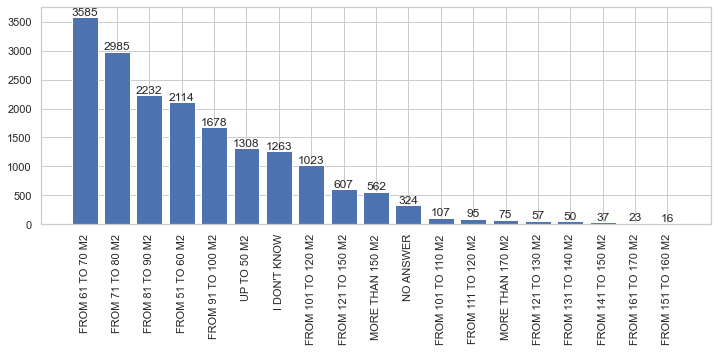

LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


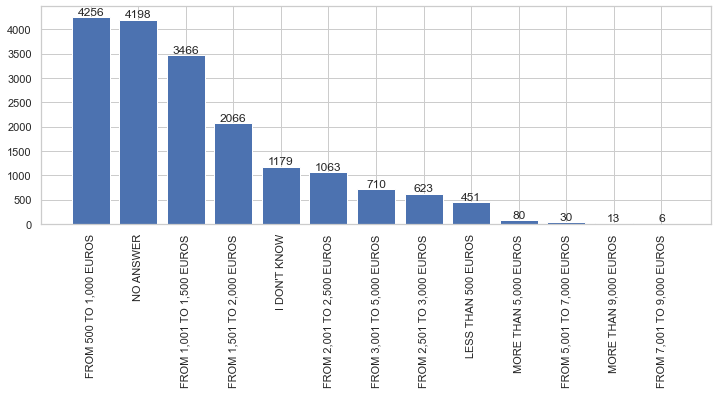

CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


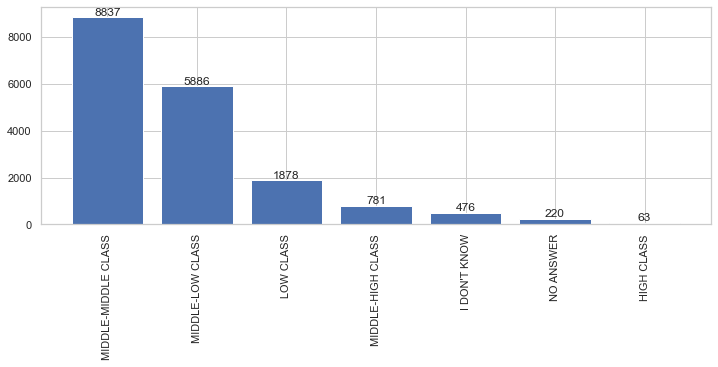

HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


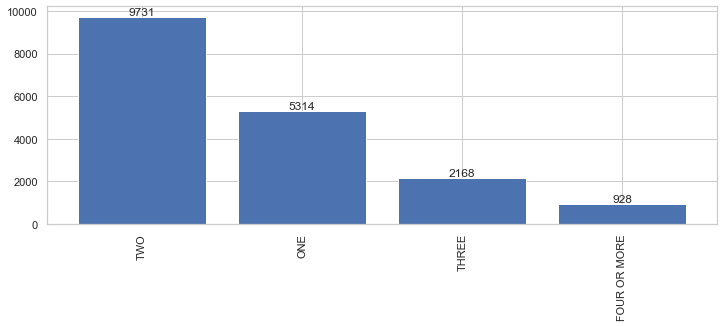

In [109]:
for i in var_list:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [110]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(size_pctg(i))


 HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


HAB_M2_1A14
FROM 101 TO 110 M2     0.59
FROM 101 TO 120 M2     5.64
FROM 111 TO 120 M2     0.52
FROM 121 TO 130 M2     0.31
FROM 121 TO 150 M2     3.35
FROM 131 TO 140 M2     0.28
FROM 141 TO 150 M2     0.20
FROM 151 TO 160 M2     0.09
FROM 161 TO 170 M2     0.13
FROM 51 TO 60 M2      11.65
FROM 61 TO 70 M2      19.76
FROM 71 TO 80 M2      16.45
FROM 81 TO 90 M2      12.30
FROM 91 TO 100 M2      9.25
I DON'T KNOW           6.96
MORE THAN 150 M2       3.10
MORE THAN 170 M2       0.41
NO ANSWER              1.79
UP TO 50 M2            7.21
dtype: float64


 LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


LLAR_INGRESSOS_1A10
FROM 1,001 TO 1,500 EUROS    19.11
FROM 1,501 TO 2,000 EUROS    11.39
FROM 2,001 TO 2,500 EUROS     5.86
FROM 2,501 TO 3,000 EUROS     3.43
FROM 3,001 TO 5,000 EUROS     3.91
FROM 5,001 TO 7,000 EUROS     0.17
FROM 500 TO 1,000 EUROS      23.46
FROM 7,001 TO 9,000 EUROS     0.03
I DON'T KNOW                  6.50
LESS THAN 500 EUROS           2.49
MORE THAN 5,000 EUROS         0.44
MORE THAN 9,000 EUROS         0.07
NO ANSWER                    23.14
dtype: float64


 CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


CLASSESOC_ENT
HIGH CLASS              0.35
I DON'T KNOW            2.62
LOW CLASS              10.35
MIDDLE-HIGH CLASS       4.31
MIDDLE-LOW CLASS       32.45
MIDDLE-MIDDLE CLASS    48.71
NO ANSWER               1.21
dtype: float64


 HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


HAB_RES_1A4
FOUR OR MORE     5.12
ONE             29.29
THREE           11.95
TWO             53.64
dtype: float64

In [111]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(ctab(i))


 HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 101 TO 120 M2,850,70
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 121 TO 150 M2,508,35
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2



 LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2670,314
"FROM 1,501 TO 2,000 EUROS",1539,216
"FROM 2,001 TO 2,500 EUROS",818,96
"FROM 2,501 TO 3,000 EUROS",467,58
"FROM 3,001 TO 5,000 EUROS",559,55
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",3280,427
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,966,90



 CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


Would_live_in_another_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,58,2
I DON'T KNOW,370,29
LOW CLASS,1329,222
MIDDLE-HIGH CLASS,644,62
MIDDLE-LOW CLASS,4413,632
MIDDLE-MIDDLE CLASS,7044,732
NO ANSWER,165,22



 HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,679,84
ONE,4218,521
THREE,1638,178
TWO,7488,918


All variables will be used in the model.

In [112]:
# HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE?
x = 'HAB_M2_1A14'
data[x].unique()

array(['UP TO 50 M2', 'FROM 51 TO 60 M2', 'FROM 61 TO 70 M2',
       'FROM 91 TO 100 M2', 'FROM 81 TO 90 M2', 'FROM 71 TO 80 M2',
       'FROM 121 TO 150 M2', 'FROM 101 TO 120 M2', "I DON'T KNOW",
       'MORE THAN 150 M2', 'NO ANSWER', 'FROM 101 TO 110 M2',
       'MORE THAN 170 M2', 'FROM 111 TO 120 M2', 'FROM 121 TO 130 M2',
       'FROM 141 TO 150 M2', 'FROM 131 TO 140 M2', 'FROM 161 TO 170 M2',
       'FROM 151 TO 160 M2'], dtype=object)

In [113]:
data_prep = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": "I DON'T KNOW"} # inserting most common value
data['House_size'] = [data_prep[i] for i in data[x]]

In [114]:
# WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME?
x = 'LLAR_INGRESSOS_1A10'
data[x].unique()

array(['FROM 500 TO 1,000 EUROS', 'LESS THAN 500 EUROS',
       'FROM 1,001 TO 1,500 EUROS', 'NO ANSWER',
       'FROM 3,001 TO 5,000 EUROS', "I DON'T KNOW",
       'FROM 1,501 TO 2,000 EUROS', 'FROM 2,001 TO 2,500 EUROS',
       'FROM 2,501 TO 3,000 EUROS', 'MORE THAN 5,000 EUROS',
       'FROM 5,001 TO 7,000 EUROS', 'FROM 7,001 TO 9,000 EUROS',
       'MORE THAN 9,000 EUROS'], dtype=object)

In [115]:
data_prep = {'LESS THAN 500 EUROS': '< 1000 EUROS',
             'FROM 500 TO 1,000 EUROS': '< 1000 EUROS',
             'FROM 1,001 TO 1,500 EUROS': '1001-2000 EUROS',
             'FROM 1,501 TO 2,000 EUROS': '1001-2000 EUROS', 
             'FROM 2,001 TO 2,500 EUROS': '2001-3000 EUROS',
             'FROM 2,501 TO 3,000 EUROS': '2001-3000 EUROS',
             'FROM 3,001 TO 5,000 EUROS': '> 3000 EUROS', 
             'FROM 5,001 TO 7,000 EUROS': '> 3000 EUROS', 
             'FROM 7,001 TO 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 5,000 EUROS': '> 3000 EUROS',
             'NO ANSWER': "I DON'T KNOW / NO ANSWER",
             "I DON'T KNOW": "I DON'T KNOW / NO ANSWER"            
             } 
data['Monthly_family_income'] = [data_prep[i] for i in data[x]]

In [116]:
# COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
x = 'CLASSESOC_ENT'
data[x].unique()

array(['MIDDLE-MIDDLE CLASS', 'LOW CLASS', 'MIDDLE-LOW CLASS',
       "I DON'T KNOW", 'MIDDLE-HIGH CLASS', 'NO ANSWER', 'HIGH CLASS'],
      dtype=object)

In [117]:
data_prep = {'MIDDLE-HIGH CLASS': 'MIDDLE-HIGH', 
             'MIDDLE-MIDDLE CLASS': 'MIDDLE-MIDDLE', 
             'MIDDLE-LOW CLASS': 'MIDDLE-LOW',
             "I DON'T KNOW": "I DON'T KNOW",
             'LOW CLASS': 'LOW', 
             'NO ANSWER': np.nan, 
             'HIGH CLASS': 'HIGH'} 
data['Social_class'] = [data_prep[i] for i in data[x]]

In [118]:
# WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
x = 'HAB_RES_1A4'
data[x].unique()

array(['ONE', 'TWO', 'THREE', 'FOUR OR MORE'], dtype=object)

In [119]:
data['Living_alone'] = data[x]

## 1.5.3 Feature engineering

Creating comparable variables - if respondends rate the city higher than the neighbourhood: 
'BCN_if_has_improved' & 'Barri_if_has_improved', 'BCN_if_will_improve' & 'Barri_if_will_improve', 'BCN_satisfaction_of_living' & 'Barri_satisfaction_of_living', 'BCN_city_management' & 'Barri_city_management', 'BCN_transport' & 'Barri_transport'.

In [120]:
data['BCN_evolution'].unique()

array(['IT IS WORSE', 'IT HAS IMPROVED', 'IT IS THE SAME', "I DON'T KNOW",
       nan], dtype=object)

In [121]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "I DON'T KNOW":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_evolution'] = new_column

In [122]:
data['BCN_future'].unique()

array(['IT WILL GET WORSE', 'IT WILL IMPROVE', 'IT WILL STAY THE SAME',
       "I DON'T KNOW", nan], dtype=object)

In [123]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL GET WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL STAY THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "I DON'T KNOW":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_future'] = new_column

In [124]:
data['BCN_satisfaction_of_living'].unique()

array(['SATISFIED', 'FAIRLY SATISFIED', 'NOT SATISFIED', nan,
       "I DON'T KNOW"], dtype=object)

In [125]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_satisfaction_of_living'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "NOT SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction_of_living'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "FAIRLY SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction_of_living'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "I DON'T KNOW":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction_of_living'] == 'FAIRLY SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "NOT SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction_of_living'] == 'FAIRLY SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "I DON'T KNOW":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_satisfaction_of_living'] = new_column

In [126]:
data['BCN_transport'].unique()

array(['GOOD', "I DON'T KNOW", 'NEITHER BAD, NOR GOOD', 'BAD', nan],
      dtype=object)

In [127]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "I DON'T KNOW":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_transport'] == "I DON'T KNOW":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_transport'] = new_column

In [128]:
data['BCN_management'].unique()

array(['GOOD', 'NEITHER BAD, NOR GOOD', "I DON'T KNOW", 'BAD', nan],
      dtype=object)

In [129]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "I DON'T KNOW":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_management'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_management'] == "I DON'T KNOW":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_management'] = new_column

In [130]:
data['BCN_citizen_security'].unique()

array(['NEITHER BAD, NOR GOOD', 'GOOD', 'BAD', "I DON'T KNOW", nan],
      dtype=object)

In [131]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_citizen_security'] == 'GOOD' and data.iloc[j]['Barri_citizen_security'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_citizen_security'] == 'GOOD' and data.iloc[j]['Barri_citizen_security'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_citizen_security'] == 'GOOD' and data.iloc[j]['Barri_citizen_security'] == "I DON'T KNOW":
        new_column.append(1)
    elif data.iloc[j]['BCN_citizen_security'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_citizen_security'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_citizen_security'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_citizen_security'] == "I DON'T KNOW":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_citizen_security'] = new_column

# 1.6 Final dataset

In [132]:
data.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,House_size,Monthly_family_income,Social_class,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
63811,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,WOMAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,I HAVE ALWAYS LIVED IN THE BARRI,IT'S WORSE,...,< 50 M2,< 1000 EUROS,MIDDLE-MIDDLE,ONE,0,0,0,0,0,0
63812,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS IMPROVED,...,51-100 M2,< 1000 EUROS,LOW,TWO,1,0,0,0,0,0
63815,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,MAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,I HAVE ALWAYS LIVED IN THE BARRI,IT'S WORSE,...,51-100 M2,< 1000 EUROS,LOW,ONE,0,0,1,0,0,0
63819,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,MAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S WORSE,...,51-100 M2,1001-2000 EUROS,MIDDLE-LOW,THREE,0,0,0,0,0,0
63821,2008,CIUTAT VELLA,EL RAVAL,EL RAVAL,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S WORSE,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,TWO,0,0,0,0,0,0


In [133]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'VAL_GESTMUNI',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_BICING',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'US_VERD',
 'US_BUS',
 'US_METRO',
 'US_BICING',
 'US_ESPORT',
 'US_SIAC',
 'US_CSS',
 'US_CULT',
 'US_FESTESPOP',
 'US_MERCAT',
 'US_BIBLIO',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4',
 'Wo

In [134]:
for x in ['ANY',
 'Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Place_of_birth',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'URBANISM',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION',
 'PARKING',
 'BUS',
 'SUBWAY',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']:
    display(size_pctg(x))

ANY
2008    8.11
2009    8.04
2010    8.10
2011    8.37
2012    8.42
2013    8.53
2014    8.51
2015    8.63
2016    8.60
2017    8.27
2018    8.26
2019    8.17
dtype: float64

Would_live_in_another_neighborhood
0.0    89.18
1.0    10.82
dtype: float64

District
CIUTAT VELLA              7.30
EIXAMPLE                 15.89
GRÀCIA                    8.00
HORTA - GUINARDÓ         11.55
LES CORTS                 7.90
NOU BARRIS               11.07
SANT ANDREU               8.25
SANT MARTÍ               12.11
SANTS - MONTJUÏC          9.62
SARRIÀ - SANT GERVASI     8.31
dtype: float64

Gender
0    39.93
1    60.07
dtype: float64

Place_of_birth
BARCELONA            44.53
FOREIGN               4.10
REST OF CATALONIA    12.13
REST OF SPAIN        39.25
dtype: float64

Time_living_in_barri
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    15.03
LESS THAN 10 YEARS                          5.82
MORE THAN 10 YEARS                         79.15
dtype: float64

Barri_evolution
I DON'T KNOW        0.94
IT HAS IMPROVED    49.83
IT IS THE SAME     28.61
IT IS WORSE        20.62
dtype: float64

BCN_evolution
I DON'T KNOW        2.52
IT HAS IMPROVED    32.48
IT IS THE SAME     25.92
IT IS WORSE        39.08
dtype: float64

Barri_future
I DON'T KNOW             12.50
IT WILL GET WORSE        15.47
IT WILL IMPROVE          53.55
IT WILL STAY THE SAME    18.49
dtype: float64

BCN_future
I DON'T KNOW             13.78
IT WILL GET WORSE        24.81
IT WILL IMPROVE          50.08
IT WILL STAY THE SAME    11.33
dtype: float64

Barri_satisfaction_of_living
FAIRLY SATISFIED    10.82
I DON'T KNOW         0.26
NOT SATISFIED        1.77
SATISFIED           87.15
dtype: float64

BCN_satisfaction_of_living
FAIRLY SATISFIED    12.36
I DON'T KNOW         0.31
NOT SATISFIED        1.69
SATISFIED           85.64
dtype: float64

Barri_citizen_security
BAD                      16.75
GOOD                     36.61
I DON'T KNOW              1.12
NEITHER BAD, NOR GOOD    45.52
dtype: float64

BCN_citizen_security
BAD                      17.80
GOOD                     25.62
I DON'T KNOW              4.32
NEITHER BAD, NOR GOOD    52.26
dtype: float64

Barri_management
BAD                       6.33
GOOD                     46.90
I DON'T KNOW              7.68
NEITHER BAD, NOR GOOD    39.09
dtype: float64

BCN_management
BAD                       9.73
GOOD                     40.34
I DON'T KNOW              4.03
NEITHER BAD, NOR GOOD    45.89
dtype: float64

Barri_comparison
I DON'T KNOW                        2.20
NEITHER THE BEST, NOR THE WORST    39.76
ONE OF THE BEST                    53.68
ONE OF THE WORST                    4.36
dtype: float64

STREETS CLEANING
BAD                       9.18
GOOD                     55.00
I DON'T KNOW              0.22
NEITHER BAD, NOR GOOD    35.60
dtype: float64

NOISE
BAD                      19.92
GOOD                     32.17
I DON'T KNOW              2.49
NEITHER BAD, NOR GOOD    45.41
dtype: float64

GREEN AREAS
BAD                       8.71
GOOD                     48.75
I DON'T KNOW              4.40
NEITHER BAD, NOR GOOD    38.15
dtype: float64

PUBLIC LIGHTING
BAD                       3.72
GOOD                     61.28
I DON'T KNOW              1.58
NEITHER BAD, NOR GOOD    33.42
dtype: float64

URBANISM
BAD                       5.29
GOOD                     44.31
I DON'T KNOW             10.27
NEITHER BAD, NOR GOOD    40.13
dtype: float64

ASPHALT AND STREET CONSERVATION
BAD                      10.19
GOOD                     43.16
I DON'T KNOW              1.20
NEITHER BAD, NOR GOOD    45.46
dtype: float64

CIRCULATION
BAD                      17.21
GOOD                     24.30
I DON'T KNOW              4.72
NEITHER BAD, NOR GOOD    53.77
dtype: float64

PARKING
BAD                      41.56
GOOD                      9.04
I DON'T KNOW             13.99
NEITHER BAD, NOR GOOD    35.41
dtype: float64

BUS
BAD                       4.27
GOOD                     65.04
I DON'T KNOW              5.04
NEITHER BAD, NOR GOOD    25.65
dtype: float64

SUBWAY
BAD                       1.43
GOOD                     71.59
I DON'T KNOW             11.70
NEITHER BAD, NOR GOOD    15.28
dtype: float64

MUNICIPAL MARKETS
BAD                       2.98
GOOD                     66.93
I DON'T KNOW              9.55
NEITHER BAD, NOR GOOD    20.54
dtype: float64

Barri_transport
BAD                      11.70
GOOD                     77.85
I DON'T KNOW              0.70
NEITHER BAD, NOR GOOD     9.74
dtype: float64

BCN_transport
BAD                       8.08
GOOD                     80.06
I DON'T KNOW              1.88
NEITHER BAD, NOR GOOD     9.98
dtype: float64

Owns_a_car
0.0    51.9
1.0    48.1
dtype: float64

House_size
101-150 M2      11.09
51-100 M2       70.69
< 50 M2          7.34
> 150 M2         3.79
I DON'T KNOW     7.09
dtype: float64

Monthly_family_income
1001-2000 EUROS             30.49
2001-3000 EUROS              9.29
< 1000 EUROS                25.95
> 3000 EUROS                 4.62
I DON'T KNOW / NO ANSWER    29.64
dtype: float64

Social_class
HIGH              0.35
I DON'T KNOW      2.66
LOW              10.48
MIDDLE-HIGH       4.36
MIDDLE-LOW       32.84
MIDDLE-MIDDLE    49.31
dtype: float64

Living_alone
FOUR OR MORE     5.12
ONE             29.29
THREE           11.95
TWO             53.64
dtype: float64

BCN_over_barri_evolution
0    90.15
1     9.85
dtype: float64

BCN_over_barri_future
0    84.84
1    15.16
dtype: float64

BCN_over_barri_satisfaction_of_living
0    92.08
1     7.92
dtype: float64

BCN_over_barri_transport
0    94.95
1     5.05
dtype: float64

BCN_over_barri_management
0    97.19
1     2.81
dtype: float64

BCN_over_barri_citizen_security
0    99.37
1     0.63
dtype: float64

In [135]:
survey_transformed = data[['ANY',
 'Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Place_of_birth',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'URBANISM',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION',
 'PARKING',
 'BUS',
 'SUBWAY',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']]

In [136]:
survey_transformed.reset_index(drop=True, inplace=True)

In [137]:
survey_transformed.head()

,ANY,Would_live_in_another_neighborhood,District,Gender,Place_of_birth,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,BCN_future,...,House_size,Monthly_family_income,Social_class,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,2008,0.0,CIUTAT VELLA,1,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS THE SAME,IT IS WORSE,IT WILL STAY THE SAME,IT WILL GET WORSE,...,< 50 M2,< 1000 EUROS,MIDDLE-MIDDLE,ONE,0,0,0,0,0,0
1,2008,0.0,CIUTAT VELLA,1,REST OF SPAIN,MORE THAN 10 YEARS,IT IS THE SAME,IT HAS IMPROVED,IT WILL IMPROVE,IT WILL IMPROVE,...,51-100 M2,< 1000 EUROS,LOW,TWO,1,0,0,0,0,0
2,2008,NaN,CIUTAT VELLA,0,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS WORSE,IT IS WORSE,IT WILL GET WORSE,IT WILL GET WORSE,...,51-100 M2,< 1000 EUROS,LOW,ONE,0,0,1,0,0,0
3,2008,0.0,CIUTAT VELLA,0,REST OF CATALONIA,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS WORSE,IT WILL IMPROVE,IT WILL GET WORSE,...,51-100 M2,1001-2000 EUROS,MIDDLE-LOW,THREE,0,0,0,0,0,0
4,2008,NaN,CIUTAT VELLA,1,REST OF SPAIN,MORE THAN 10 YEARS,IT IS THE SAME,IT IS WORSE,IT WILL STAY THE SAME,IT WILL GET WORSE,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,TWO,0,0,0,0,0,0


In [138]:
survey_transformed.shape

(18141, 41)

In [139]:
survey_transformed.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    14023
1.0     1701
dtype: int64

In [140]:
survey_transformed.groupby(['District']).size()

District
CIUTAT VELLA             1325
EIXAMPLE                 2883
GRÀCIA                   1451
HORTA - GUINARDÓ         2096
LES CORTS                1433
NOU BARRIS               2008
SANT ANDREU              1496
SANT MARTÍ               2197
SANTS - MONTJUÏC         1745
SARRIÀ - SANT GERVASI    1507
dtype: int64

In [141]:
survey_transformed.groupby(['Gender']).size()

Gender
0     7243
1    10898
dtype: int64

In [142]:
survey_transformed.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
survey_transformed.shape

(15075, 41)

In [144]:
survey_transformed.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    13439
1.0     1636
dtype: int64

In [145]:
survey_transformed.groupby(['District']).size()

District
CIUTAT VELLA             1084
EIXAMPLE                 2439
GRÀCIA                   1220
HORTA - GUINARDÓ         1746
LES CORTS                1250
NOU BARRIS               1606
SANT ANDREU              1271
SANT MARTÍ               1803
SANTS - MONTJUÏC         1388
SARRIÀ - SANT GERVASI    1268
dtype: int64

In [146]:
survey_transformed.groupby(['Gender']).size()

Gender
0    5847
1    9228
dtype: int64

In [147]:
survey_transformed.to_pickle("survey_transformed.pkl")